In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [ ]:
X_train_df=pd.read_csv('C:/Users/ppksloh/Desktop/ASM AI/UTL/dataset/15_nov_2021_loh_BB/BallShear_dataset/BB_X_train')
x_test_df=pd.read_csv('C:/Users/ppksloh/Desktop/ASM AI/UTL/dataset/15_nov_2021_loh_BB/BallShear_dataset/BB_x_test')
Y_train=pd.read_csv('C:/Users/ppksloh/Desktop/ASM AI/UTL/dataset/15_nov_2021_loh_BB/BallShear_dataset/BB_Y_train')
y_test=pd.read_csv('C:/Users/ppksloh/Desktop/ASM AI/UTL/dataset/15_nov_2021_loh_BB/BallShear_dataset/BB_y_test')

In [ ]:
pd.set_option('display.max_rows',None,'display.max_columns',None)

In [ ]:
x_feature_drop=['DATE','MACHINE_ID','LOT_ID','LF_ID','INPUT_MAG_NO','UNIT_NO','ROW_NO','COL_NO','WIRE_NO','BOND_RESULT']

In [ ]:
X_train = X_train_df.drop(x_feature_drop,axis=1)
x_test = x_test_df.drop(x_feature_drop,axis=1)

In [ ]:
x_test.head()

,HEAT_PRE,HEAT_BOND,HEAT_POST,BOND_POSITION_X,BOND_POSITION_Y,WIRE_ANGLE,WIRE_LENGTH,Tail_HTime,EFO_ChargeVol,FABSeatPwr_RiseTime,FABSeatPwr_MaxImpedance,FABSeatPwr_MeanImpedance,FABSeatPwr_MeanCurrent,FABSeatPwr_RamDownTime,FABSeatPwr_MaxPhaseAngle,FABSeatPwr_PhaseLockTime,Search_Height,Search_MaxSearchDelay,Search_MaxVelocityError,Search_MaxXYPosError,Search_Speed,Search_DacZMean,Touch_Height,Touch_Time,Ref_ContactVelocityError,Force_RiseTime_2,Force_MinForce_2,Force_MaxForce_2,Force_MinZOffset_2,Force_SettlingTime_2,Force_MeanForce_2,Force_ErrSTD_2,USG_RiseTime_2,USG_MaxImpedance_2,USG_MeanCurrent_2,USG_MaxPhaseAngle_2,USG_PhaseLockTime_2,Force_RiseTime_3,Force_MinForce_3,Force_MaxForce_3,Force_MinZOffset_3,Force_MaxZOffset_3,Force_EndZOffset_3,Force_TotalEndZOffset_3,Force_SettlingTime_3,Force_ErrSTD_3,USG_RiseTime_3,USG_MaxImpedance_3,USG_SettlingTime_3,USG_PhaseLockTime_3,XPower_Amplitude_3,SCRUB_Dist_3,SCRUB_MaxAmp_3,SCRUB_MinAmp_3,SCRUB_Time_3,Force_RiseTime_4,Force_MinForce_4,Force_MaxForce_4,Force_MinZOffset_4,Force_MaxZOffset_4,Force_EndZOffset_4,Force_SettlingTime_4,Force_ErrSTD_4,USG_MeanCurrent_4,USG_MaxPhaseAngle_4,USG_PhaseLockTime_4,Force_RiseTime_5,Force_MinForce_5,Force_MaxForce_5,Force_MinZOffset_5,Force_MaxZOffset_5,Force_EndZOffset_5,Force_MeanForce_5,Force_ErrSTD_5,USG_PhaseLockTime_5,Force_RiseTime_6,Force_MinZOffset_6,Force_EndZOffset_6,Force_MeanForce_6,Force_ErrSTD_6,ZSoftRelease_HT
0,199.998,199.977,199.959,24817.969,20498.266,118.653,1131.321,4.813,2662,1.375,18.137,14.626,480.371,3.313,0.0,2.313,6.691,5.938,15.400,0.134,10.254,-164.442,82.006,0.063,72.146,0.563,19.986,57.133,0.0,3.563,40.978,11.811,0.875,40.338,106.520,0.813,1.938,2.125,5.633,12.928,-4.179,0.183,-2.754,13.522,22.250,4.182,5.438,12.968,24.813,0.125,0.656,0.039,2.992,0.195,10.938,1.813,14.385,16.767,-0.015,0.577,0.175,6.063,1.035,317.959,0.0,-0.063,1.813,11.479,12.481,-0.314,0.131,-0.051,11.928,0.515,13.438,1.625,-0.066,0.197,16.789,0.342,-0.212
1,200.007,199.966,199.987,24507.133,24345.070,-177.388,827.289,5.375,2821,1.375,18.898,15.373,470.079,3.125,1.0,2.438,7.049,3.438,13.086,0.088,10.368,-157.513,37.357,5.313,79.533,0.563,19.231,55.054,0.0,3.563,40.848,11.364,0.688,41.579,99.443,0.739,1.313,2.188,5.428,13.429,-4.332,0.321,-2.499,13.164,22.063,4.213,5.438,14.790,24.813,2.625,0.659,0.071,2.875,0.117,11.375,1.875,13.979,16.222,-0.139,0.387,0.102,6.188,1.087,284.485,0.0,-0.063,0.063,11.188,15.079,-0.329,0.161,-0.051,12.055,0.582,0.063,1.625,-0.059,0.314,16.902,0.332,-0.168
2,199.986,200.006,200.048,25027.234,18682.078,-102.278,817.575,4.875,2579,1.375,18.385,14.974,474.713,3.250,1.0,2.313,8.963,4.875,11.270,0.215,10.412,-155.594,66.066,0.063,72.535,0.563,17.427,57.071,0.0,3.563,41.054,12.424,0.688,40.776,101.304,0.588,1.688,2.313,4.516,12.542,-4.624,0.526,-2.652,14.924,21.938,3.984,5.438,14.169,24.813,1.563,0.659,0.122,2.922,0.211,12.438,0.938,13.231,16.371,-0.131,0.636,0.117,7.063,1.166,302.066,0.0,-0.063,2.125,11.078,12.682,-0.146,0.336,0.227,11.917,0.526,0.688,1.625,-0.153,0.212,16.727,0.555,-0.153
3,200.108,200.005,199.932,26615.992,23502.703,-65.430,929.003,5.563,2540,1.313,21.954,16.465,441.737,4.000,1.0,2.438,3.930,3.188,13.506,0.231,10.204,-168.492,48.819,0.063,79.596,0.563,17.460,59.145,0.0,3.563,40.999,12.551,0.563,66.398,79.925,1.053,1.563,1.938,7.130,12.034,-4.069,0.073,-3.061,12.857,22.563,4.243,5.375,12.749,24.875,1.438,0.659,0.035,3.156,0.211,11.500,1.625,13.284,16.746,-0.205,0.548,0.139,6.125,1.097,309.248,0.0,-0.063,2.063,10.417,12.716,-0.475,0.132,-0.146,11.913,0.586,0.500,2.000,-0.073,0.292,17.153,0.823,-0.197
4,198.557,199.981,199.968,26138.555,23479.234,-86.305,795.638,5.563,2562,1.375,17.338,13.269,441.432,3.688,1.0,2.438,4.003,3.250,11.341,0.098,10.158,-206.375,55.189,0.063,58.617,0.500,16.967,60.772,0.0,3.625,41.200,13.972,0.875,40.782,99.819,0.455,2.250,2.125,4.231,11.742,-4.295,0.380,-2.863,17.094,22.000,4.149,5.375,11.026,24.875,0.250,0.656,0.031,2.977,0.250,10.875,1.688,13.615,15.517,0.000,0.460,0.358,6.

In [ ]:
X_train.head()

,HEAT_PRE,HEAT_BOND,HEAT_POST,BOND_POSITION_X,BOND_POSITION_Y,WIRE_ANGLE,WIRE_LENGTH,Tail_HTime,EFO_ChargeVol,FABSeatPwr_RiseTime,FABSeatPwr_MaxImpedance,FABSeatPwr_MeanImpedance,FABSeatPwr_MeanCurrent,FABSeatPwr_RamDownTime,FABSeatPwr_MaxPhaseAngle,FABSeatPwr_PhaseLockTime,Search_Height,Search_MaxSearchDelay,Search_MaxVelocityError,Search_MaxXYPosError,Search_Speed,Search_DacZMean,Touch_Height,Touch_Time,Ref_ContactVelocityError,Force_RiseTime_2,Force_MinForce_2,Force_MaxForce_2,Force_MinZOffset_2,Force_SettlingTime_2,Force_MeanForce_2,Force_ErrSTD_2,USG_RiseTime_2,USG_MaxImpedance_2,USG_MeanCurrent_2,USG_MaxPhaseAngle_2,USG_PhaseLockTime_2,Force_RiseTime_3,Force_MinForce_3,Force_MaxForce_3,Force_MinZOffset_3,Force_MaxZOffset_3,Force_EndZOffset_3,Force_TotalEndZOffset_3,Force_SettlingTime_3,Force_ErrSTD_3,USG_RiseTime_3,USG_MaxImpedance_3,USG_SettlingTime_3,USG_PhaseLockTime_3,XPower_Amplitude_3,SCRUB_Dist_3,SCRUB_MaxAmp_3,SCRUB_MinAmp_3,SCRUB_Time_3,Force_RiseTime_4,Force_MinForce_4,Force_MaxForce_4,Force_MinZOffset_4,Force_MaxZOffset_4,Force_EndZOffset_4,Force_SettlingTime_4,Force_ErrSTD_4,USG_MeanCurrent_4,USG_MaxPhaseAngle_4,USG_PhaseLockTime_4,Force_RiseTime_5,Force_MinForce_5,Force_MaxForce_5,Force_MinZOffset_5,Force_MaxZOffset_5,Force_EndZOffset_5,Force_MeanForce_5,Force_ErrSTD_5,USG_PhaseLockTime_5,Force_RiseTime_6,Force_MinZOffset_6,Force_EndZOffset_6,Force_MeanForce_6,Force_ErrSTD_6,ZSoftRelease_HT
0,199.995,200.016,199.822,24699.211,24009.797,-179.308,1005.636,4.938,2643,1.375,17.489,13.121,417.201,4.250,1.000,2.438,4.383,3.688,15.664,0.042,10.560,-163.139,57.359,0.063,56.719,0.563,19.325,59.299,0.0,3.563,40.902,12.115,0.813,48.815,92.099,0.667,1.625,2.125,5.133,11.992,-4.164,0.000,-2.629,13.412,22.250,4.400,5.375,10.646,24.875,3.563,0.659,0.011,2.969,0.195,11.813,0.688,13.036,16.217,-0.161,0.365,0.124,7.188,1.094,288.360,0.0,-0.063,2.313,10.781,12.379,-0.409,0.037,-0.110,11.589,0.608,0.063,2.000,-0.161,0.278,16.440,0.942,-0.087
1,199.982,200.031,200.007,24933.820,25317.406,122.648,1136.374,4.875,2584,1.313,21.051,15.290,460.845,3.938,1.071,1.625,6.889,3.500,14.145,0.198,10.025,-161.810,57.702,0.063,77.278,0.563,19.618,58.327,0.0,3.563,40.968,12.239,0.750,63.438,87.323,0.882,1.875,2.125,4.205,12.765,-3.923,0.000,-2.842,12.280,22.313,4.477,5.375,11.412,24.875,1.563,0.659,0.017,3.078,0.227,11.938,1.875,13.553,16.798,0.000,0.694,0.321,6.250,1.332,332.712,0.0,-0.063,0.063,10.239,15.031,-0.431,0.146,-0.080,12.037,0.663,0.063,1.938,-0.168,0.292,17.256,0.912,-0.073
2,200.025,200.026,200.013,26576.414,23668.367,-35.141,896.544,4.938,2767,1.375,17.391,13.054,418.456,4.188,1.000,2.438,9.730,3.250,13.109,0.144,10.379,-179.812,59.178,0.063,63.313,0.563,22.120,56.941,0.0,3.563,40.953,11.249,0.813,48.041,91.825,0.800,2.000,2.188,4.165,12.494,-4.419,0.125,-2.849,13.339,22.250,4.366,5.375,10.656,24.875,0.375,0.659,0.031,2.992,0.125,11.625,0.813,13.899,16.223,0.000,0.533,0.270,7.063,1.032,288.263,0.0,-0.063,0.063,11.049,14.820,-0.380,0.029,-0.263,11.764,0.528,0.125,2.000,-0.007,0.336,16.727,0.728,-0.197
3,199.964,199.993,199.889,24654.563,20498.219,-175.296,852.323,4.813,2706,1.313,20.243,14.694,469.574,4.188,0.000,2.500,7.590,3.625,10.895,0.206,10.552,-134.714,70.311,0.063,57.840,0.500,19.782,57.171,0.0,3.625,40.977,12.011,0.563,63.208,89.027,0.556,1.625,2.375,4.046,12.952,-4.062,0.299,-2.754,14.004,22.000,4.242,5.375,12.077,24.875,0.688,0.656,0.040,3.070,0.141,11.563,1.438,13.340,15.914,0.000,0.570,0.416,6.438,1.112,324.286,0.0,-0.063,1.313,10.364,12.376,-0.504,0.081,-0.321,11.586,0.650,0.063,1.875,-0.037,0.365,16.341,0.619,-0.073
4,199.997,199.994,200.021,25645.453,23429.484,-101.617,848.473,5.188,2633,1.313,21.189,15.625,454.385,4.125,1.000,2.438,4.609,4.063,9.003,0.133,10.176,-167.082,71.202,0.063,80.948,0.563,20.352,57.428,0.0,3.563,40.368,11.465,0.625,64.566,81.936,0.786,1.938,1.938,4.445,13.126,-4.456,0.000,-2.951,12.272,22.438,4.412,5.375,11.940,24.875,1.500,0.662,0.094,3.102,0.156,11.125,1.000,13.300,16.170,0.000,0.694,0.

In [ ]:
X_train_df['BOND_RESULT'].unique()

array(['Pass', 'NSOL', 'NSOP', 'ShortTail'], dtype=object)

In [ ]:
Y_train=Y_train['BallShear']
Y_train

0       41.610
1       40.350
2       39.260
3       39.110
4       34.390
5       38.140
6       40.410
7       39.010
8       39.850
9       38.160
10      40.140
11      40.230
12      35.320
13      40.100
14      37.910
15      37.930
16      31.530
17      39.540
18      35.340
19      39.910
20      35.100
21      38.990
22      26.340
23      33.930
24      36.490
25      45.890
26      39.890
27      37.730
28      33.240
29      40.490
30      38.320
31      39.810
32      35.270
33      34.900
34      39.450
35      45.740
36      42.830
37      36.860
38      36.460
39      39.020
40      39.350
41      35.833
42      32.480
43      41.840
44      44.220
45      37.270
46      35.790
47      33.750
48      36.870
49      41.420
50      38.550
51      41.020
52      38.380
53      34.910
54      38.480
55      34.590
56      37.310
57      39.960
58      34.730
59      38.370
60      39.530
61      37.890
62      36.970
63      41.230
64      41.570
65      36.310
66      34

In [ ]:
y_test=y_test['BallShear']
y_test.head()

0    37.19
1    35.44
2    38.57
3    42.24
4    39.50
Name: BallShear, dtype: float64

In [ ]:
y_test.shape

(1448,)

In [ ]:
Y_train.shape

(4344,)

In [ ]:
len(Y_train)/(len(Y_train)+len(y_test))

0.75

In [ ]:
Y_train.head()

0    41.61
1    40.35
2    39.26
3    39.11
4    34.39
Name: BallShear, dtype: float64

In [ ]:
Y_train.dtype

dtype('float64')

### Default XGBRegressor Performance

In [ ]:
model=xgb.XGBRegressor(objective='reg:squarederror', missing=0,seed=42)

In [ ]:
model.fit(X_train,Y_train, early_stopping_rounds=20, eval_set=[(X_train,Y_train),(x_test,y_test)], eval_metric='rmse')

[0]	validation_0-rmse:26.61935	validation_1-rmse:26.50416
[1]	validation_0-rmse:18.80810	validation_1-rmse:18.69497
[2]	validation_0-rmse:13.38962	validation_1-rmse:13.28025
[3]	validation_0-rmse:9.65833	validation_1-rmse:9.57107
[4]	validation_0-rmse:7.12044	validation_1-rmse:7.05693
[5]	validation_0-rmse:5.42094	validation_1-rmse:5.42455
[6]	validation_0-rmse:4.32327	validation_1-rmse:4.40818
[7]	validation_0-rmse:3.63499	validation_1-rmse:3.79742
[8]	validation_0-rmse:3.21951	validation_1-rmse:3.45963
[9]	validation_0-rmse:2.96711	validation_1-rmse:3.28469
[10]	validation_0-rmse:2.83443	validation_1-rmse:3.18781
[11]	validation_0-rmse:2.72317	validation_1-rmse:3.15546
[12]	validation_0-rmse:2.65266	validation_1-rmse:3.12500
[13]	validation_0-rmse:2.56963	validation_1-rmse:3.12274
[14]	validation_0-rmse:2.53053	validation_1-rmse:3.11962
[15]	validation_0-rmse:2.45029	validation_1-rmse:3.12509
[16]	validation_0-rmse:2.41830	validation_1-rmse:3.12528
[17]	validation_0-rmse:2.40008	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=0, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [ ]:
model.evals_result()

{'validation_0': OrderedDict([('rmse',
               [26.619354,
                18.808098,
                13.389616,
                9.658328,
                7.120439,
                5.420938,
                4.323267,
                3.634991,
                3.219515,
                2.967113,
                2.83443,
                2.723167,
                2.652665,
                2.569632,
                2.530532,
                2.450294,
                2.418301,
                2.400083,
                2.368895,
                2.296479,
                2.282316,
                2.252532,
                2.223591,
                2.174725,
                2.136234,
                2.104213,
                2.059945,
                2.039188,
                2.017776,
                2.003999,
                1.996998,
                1.951088,
                1.930684,
                1.894734,
                1.861067])]),
 'validation_1': OrderedDict([('rmse',
      

In [ ]:
X_train.head()

,HEAT_PRE,HEAT_BOND,HEAT_POST,BOND_POSITION_X,BOND_POSITION_Y,WIRE_ANGLE,WIRE_LENGTH,Tail_HTime,EFO_ChargeVol,FABSeatPwr_RiseTime,FABSeatPwr_MaxImpedance,FABSeatPwr_MeanImpedance,FABSeatPwr_MeanCurrent,FABSeatPwr_RamDownTime,FABSeatPwr_MaxPhaseAngle,FABSeatPwr_PhaseLockTime,Search_Height,Search_MaxSearchDelay,Search_MaxVelocityError,Search_MaxXYPosError,Search_Speed,Search_DacZMean,Touch_Height,Touch_Time,Ref_ContactVelocityError,Force_RiseTime_2,Force_MinForce_2,Force_MaxForce_2,Force_MinZOffset_2,Force_SettlingTime_2,Force_MeanForce_2,Force_ErrSTD_2,USG_RiseTime_2,USG_MaxImpedance_2,USG_MeanCurrent_2,USG_MaxPhaseAngle_2,USG_PhaseLockTime_2,Force_RiseTime_3,Force_MinForce_3,Force_MaxForce_3,Force_MinZOffset_3,Force_MaxZOffset_3,Force_EndZOffset_3,Force_TotalEndZOffset_3,Force_SettlingTime_3,Force_ErrSTD_3,USG_RiseTime_3,USG_MaxImpedance_3,USG_SettlingTime_3,USG_PhaseLockTime_3,XPower_Amplitude_3,SCRUB_Dist_3,SCRUB_MaxAmp_3,SCRUB_MinAmp_3,SCRUB_Time_3,Force_RiseTime_4,Force_MinForce_4,Force_MaxForce_4,Force_MinZOffset_4,Force_MaxZOffset_4,Force_EndZOffset_4,Force_SettlingTime_4,Force_ErrSTD_4,USG_MeanCurrent_4,USG_MaxPhaseAngle_4,USG_PhaseLockTime_4,Force_RiseTime_5,Force_MinForce_5,Force_MaxForce_5,Force_MinZOffset_5,Force_MaxZOffset_5,Force_EndZOffset_5,Force_MeanForce_5,Force_ErrSTD_5,USG_PhaseLockTime_5,Force_RiseTime_6,Force_MinZOffset_6,Force_EndZOffset_6,Force_MeanForce_6,Force_ErrSTD_6,ZSoftRelease_HT
0,199.995,200.016,199.822,24699.211,24009.797,-179.308,1005.636,4.938,2643,1.375,17.489,13.121,417.201,4.250,1.000,2.438,4.383,3.688,15.664,0.042,10.560,-163.139,57.359,0.063,56.719,0.563,19.325,59.299,0.0,3.563,40.902,12.115,0.813,48.815,92.099,0.667,1.625,2.125,5.133,11.992,-4.164,0.000,-2.629,13.412,22.250,4.400,5.375,10.646,24.875,3.563,0.659,0.011,2.969,0.195,11.813,0.688,13.036,16.217,-0.161,0.365,0.124,7.188,1.094,288.360,0.0,-0.063,2.313,10.781,12.379,-0.409,0.037,-0.110,11.589,0.608,0.063,2.000,-0.161,0.278,16.440,0.942,-0.087
1,199.982,200.031,200.007,24933.820,25317.406,122.648,1136.374,4.875,2584,1.313,21.051,15.290,460.845,3.938,1.071,1.625,6.889,3.500,14.145,0.198,10.025,-161.810,57.702,0.063,77.278,0.563,19.618,58.327,0.0,3.563,40.968,12.239,0.750,63.438,87.323,0.882,1.875,2.125,4.205,12.765,-3.923,0.000,-2.842,12.280,22.313,4.477,5.375,11.412,24.875,1.563,0.659,0.017,3.078,0.227,11.938,1.875,13.553,16.798,0.000,0.694,0.321,6.250,1.332,332.712,0.0,-0.063,0.063,10.239,15.031,-0.431,0.146,-0.080,12.037,0.663,0.063,1.938,-0.168,0.292,17.256,0.912,-0.073
2,200.025,200.026,200.013,26576.414,23668.367,-35.141,896.544,4.938,2767,1.375,17.391,13.054,418.456,4.188,1.000,2.438,9.730,3.250,13.109,0.144,10.379,-179.812,59.178,0.063,63.313,0.563,22.120,56.941,0.0,3.563,40.953,11.249,0.813,48.041,91.825,0.800,2.000,2.188,4.165,12.494,-4.419,0.125,-2.849,13.339,22.250,4.366,5.375,10.656,24.875,0.375,0.659,0.031,2.992,0.125,11.625,0.813,13.899,16.223,0.000,0.533,0.270,7.063,1.032,288.263,0.0,-0.063,0.063,11.049,14.820,-0.380,0.029,-0.263,11.764,0.528,0.125,2.000,-0.007,0.336,16.727,0.728,-0.197
3,199.964,199.993,199.889,24654.563,20498.219,-175.296,852.323,4.813,2706,1.313,20.243,14.694,469.574,4.188,0.000,2.500,7.590,3.625,10.895,0.206,10.552,-134.714,70.311,0.063,57.840,0.500,19.782,57.171,0.0,3.625,40.977,12.011,0.563,63.208,89.027,0.556,1.625,2.375,4.046,12.952,-4.062,0.299,-2.754,14.004,22.000,4.242,5.375,12.077,24.875,0.688,0.656,0.040,3.070,0.141,11.563,1.438,13.340,15.914,0.000,0.570,0.416,6.438,1.112,324.286,0.0,-0.063,1.313,10.364,12.376,-0.504,0.081,-0.321,11.586,0.650,0.063,1.875,-0.037,0.365,16.341,0.619,-0.073
4,199.997,199.994,200.021,25645.453,23429.484,-101.617,848.473,5.188,2633,1.313,21.189,15.625,454.385,4.125,1.000,2.438,4.609,4.063,9.003,0.133,10.176,-167.082,71.202,0.063,80.948,0.563,20.352,57.428,0.0,3.563,40.368,11.465,0.625,64.566,81.936,0.786,1.938,1.938,4.445,13.126,-4.456,0.000,-2.951,12.272,22.438,4.412,5.375,11.940,24.875,1.500,0.662,0.094,3.102,0.156,11.125,1.000,13.300,16.170,0.000,0.694,0.

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(x_test)

In [ ]:
def XGB_model_evaluation_function (model,label,over_under_reject_analyze_feature,output_spec_limits,train_df,test_df,X_train,x_test,Y_train,y_test):
    ### 1. Plot Model performance RMSE of training and validation set
    ### 2. Confusion matrix scatter plot of "training data" and "testing data" [ evaluate how good is the model performance on training and testing ]
        # use train model re-predict "training data " and plot scatter confusion matrix
    ### 3. Plot Over Reject Graph 
    ### 4. Plot Over Reject Graph 
    
    ### Hyper Parameter
        # 1. model = Trained model
        # 2. label = Y output name
        # 3. output_spec_limits = output spec limit
                # is a list = [lower spec limit , upper spec limit ]
                # if no spec = 'Null' , Ex : [ 35, 'Null']

        ### NOTE !!! [ Dataset below consist of all original value from original dataset ]
        # 4. train_df = include all features in dataset  [ exclude output feature columns] --- [ Note!!!   training_df + testing_df = original dataset ]
        # 5. testing_df = include all features in dataset  [ exclude output feature columns] --- [ Note!!!   training_df + testing_df = original dataset ]
        
        ### NOTE !!! [ Dataset below is ready to fit into model for training - done normalization/stadardization or getdummies]
        # 6. X_train / x_test = dataframe include input features that are necessary to train the model 
        # 7. Y_train / y_test = dataframe include output features that are necessary to train the model

    
    import matplotlib.pyplot as plt
    import seaborn as sns 
    import numpy as np
    import pandas as pd
    import matplotlib.lines as mlines

    
    def _mean_max_stdev_calculate_function (variable):
        ### Calculate and return "variable" : Min, Max, Mean, Stdev ###
        
        mean = round(np.mean(variable),2)
        stdev =round(np.std(variable),2)
        maximum = round(np.max(variable),2)
        minimum = round(np.min(variable),2)
        
        return minimum,maximum,mean,stdev
    
    
    def _evaluate_train_test_model_function(model,label,output_spec_limits,train_df,test_df,X_train,x_test,Y_train,y_test):
        ### 1. Plot Train Test Confusion Matrix Plot 
        ### 2. Plot Residual train test Distribution/Density plot
    
        
        ### Return train_df, test_df
            # Train_df = training dataset consist of "Actual Output column" and "Predicted Output column"
            # Test_df = Testing dataset consist of "Actual Output column" and "Predicted Output column"
        
        
        
        ##  1. Plot Train Test Confusion Matrix Plot  ##
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(x_test)
        
        # Statistical value #
        train_actual_min, train_actual_max, train_actual_mean, train_actual_stdev = _mean_max_stdev_calculate_function(Y_train)
        train_pred_min, train_pred_max, train_pred_mean, train_pred_stdev = _mean_max_stdev_calculate_function(train_pred)
        
        test_actual_min, test_actual_max, test_actual_mean, test_actual_stdev = _mean_max_stdev_calculate_function (y_test)
        test_pred_min, test_pred_max, test_pred_mean, test_pred_stdev = _mean_max_stdev_calculate_function (test_pred)
        
        
        fig, ax = plt.subplots(figsize=(15,15))
        if output_spec_limits[0] != 'Null' :
            ax.axvline(output_spec_limits[0], 
                       linestyle='--',
                       color='r' , 
                       label='Spec L.limit:'+str(output_spec_limits[0]))  # Plot Actual Ground Truth Lower Limit line
            ax.axhline(output_spec_limits[0], 
                       linestyle='--',
                       color='r') # Predicted Ground Truth Value
        if output_spec_limits[1] != 'Null' :
            ax.axvline(output_spec_limits[1], 
                       linestyle='--',
                       color='m',
                       label='Spec L.limit:'+str(output_spec_limits[1]))  # Plot Actual Ground Truth Lower Limit line
            ax.axhline(output_spec_limits[1], 
                       linestyle='--',
                       color='m') # Predicted Ground Truth Value
            
        ax.scatter(Y_train, 
                   train_pred, 
                   color = 'b', 
                   marker = 'o',
                   label = label+'_Train_Actual [ mean:'+str(train_actual_mean)+', std:'+str(train_actual_stdev)+', max:'+str(train_actual_max)+', min:'+str(train_actual_min)+']\n'+label+'_Train_Pred [ mean:'+str(train_pred_mean)+', std:'+str(train_pred_stdev)+', max:'+str(train_pred_max)+', min:'+str(train_pred_min)+']'
                  ) # Scatter plot Training Dataset of "actual vs predicted"
        ax.scatter(y_test, 
                   test_pred, 
                   color='r', 
                   marker ='o',
                   label = label+'_Test_Actual [ mean:'+str(test_actual_mean)+', std:'+str(test_actual_stdev)+', max:'+str(test_actual_max)+', min:'+str(test_actual_min)+']\n'+label+'_Test_Pred [ mean:'+str(test_pred_mean)+', std:'+str(test_pred_stdev)+', max:'+str(test_pred_max)+', min:'+str(test_pred_min)+']'
                  ) # Scatter plot Testing Dataset of "actual vs predicted"
        plt.xlabel('Actual '+label)
        plt.ylabel('Predicted '+label)
        plt.title('['+label+'] Train Test Confusion Matrix Scatter Plot')
        plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=8)
        
        
        
        ## 2. Plot Residual train test Distribution/Density plot  ##
            # Residual = absolute ( "Y_actual_value" - " Y_Predicted_value")
            
        train_df[label+'_Actual'] = Y_train
        train_df[label+'_Predict'] = train_pred
        train_df[label+'_Residual'] = abs(train_df[label+'_Actual'] - train_df[label+'_Predict'] )
        
        test_df[label+'_Actual'] = y_test
        test_df[label+'_Predict'] = test_pred
        test_df[label+'_Residual'] = abs(test_df[label+'_Actual'] -  test_df[label+'_Predict'])
        
        ## Distplot with Distibution Plot ( Turn on to draw ) ##
        fig,ax1 = plt.subplots(figsize=(15,15))
        sns.distplot(train_df[label+'_Residual'], ax=ax1, color='b', kde=False)
        sns.distplot(test_df[label+'_Residual'], ax=ax1, color='r', kde=False)
        plt.xlabel('Residual Value')
        plt.ylabel('Counts')
        plt.legend(['Train','Test'])
        plt.title('Model Residual Error Distribution Plot [Residue = abs("Actual" - "Predicted")]')
        
        ## Distplot with Density Plot ( Turn on to draw ) ##
        fig,ax1 = plt.subplots(figsize=(15,15))
        sns.distplot(train_df[label+'_Residual'], ax=ax1, color='b', kde=True)
        sns.distplot(test_df[label+'_Residual'], ax=ax1, color='r', kde=True)
        plt.xlabel('Residual Value')
        plt.ylabel('Density')
        plt.legend(['Train','Test'])
        plt.title('Model Residual Error Density Plot [Residue = abs("Actual" - "Predicted")]')
        
        ## Histplot  ( Turn on to draw ) ##
#         fig,ax1 = plt.subplots(figsize=(15,15))
#         ax1.hist(train_df[label+'_Residual'], color='b')
#         ax1.hist(test_df[label+'_Residual'], color='r')
#         plt.legend(['Train','Test'])
#         plt.title('Model Residual Error Distribution Plot [Residue = abs("Actual" - "Predicted")]')
        
        return train_df,test_df

    
    
    
    
    def _train_test_evals_result_plot(model):
        
        ### Plot Model Train Test Lost Function Trends ### 
        
        
        if len(model.evals_result().keys()) ==1:

            score_type = list(model.evals_result()['validation_0'].keys())[0] # find the "eval_metric" type used in this model
            y_axis_1 = model.evals_result()['validation_0'][score_type] # y-axis evaluation training result scores
            epochs = len(y_axis_1) # x_axis number of epochs
            x_axis= range(0,epochs)

            final_train_score =y_axis_1[-1] # final model training dataset epoch score

            ## plot figure ##

            fig, ax = plt.subplots(figsize=(15,15))
            ax.plot(x_axis, y_axis_1, label='Training_'+score_type , marker='o', color='b' )
            plt.text(x_axis[-1]+1, y_axis_1[-1], '[Last Epochs Train '+score_type+' : '+str(final_train_score)+']') # Add final rmse value test to plot graph
            ax.legend()
            plt.xlabel('Rounds [ Epochs ]')
            plt.ylabel('Lost Function [ '+score_type+ ' ]')
            plt.title('Model Train Test Lost Function Trends ')
            plt.grid()
            
            return

        elif len(model.evals_result().keys()) == 2:

            score_type = list(model.evals_result()['validation_0'].keys())[0] # find the "eval_metric" type used in this model
            y_axis_1 = model.evals_result()['validation_0'][score_type] # y-axis evaluation Training result scores
            y_axis_2 = model.evals_result()['validation_1'][score_type] # y-axis evaluation Testing result scores
            epochs = len(y_axis_1) # x_axis number of epochs
            x_axis= range(0,epochs)
            final_train_score =y_axis_1[-1] # final model training dataset epoch score
            final_test_score =y_axis_2[-1] # final model testing dataset epoch score

            ## plot figure ## 
            fig,ax = plt.subplots(figsize=(15,15))
            ax.plot(x_axis, y_axis_1, label='Training_dataset_'+score_type,  marker = 'o', color='b')
            plt.text(x_axis[-1]+1, y_axis_1[-1], '[Last Epochs Train '+score_type+' : '+str(final_train_score)+']')

            ax.plot(x_axis, y_axis_2, label='Testing_dataset_'+score_type,  marker='o', color='r')
            plt.text(x_axis[-1]+1, y_axis_2[-1], '[Last Epochs Test '+score_type+' : '+str(final_test_score)+']')

            ax.legend()
            plt.xlabel('Rounds [ Epochs ]')
            plt.ylabel('Lost Function [ '+score_type+ ' ]')
            plt.title('Model Train Test Lost Function Trends ')
            plt.grid()
            
            return
            
        else:
            print("Model Evals_result more 2 types [ Training and Testing ] ... edit code on  [ XGB_model_evaluation_function ] ")
        
            return
        
    
    
    
    def _analyze_over_under_reject_function(train_df,test_df,label,output_spec_limits, over_under_reject_analyze_feature):
        ### 1. Plot Over Reject Graph ###
        ### 2. Plot Over Reject Graph ###
            # Plot 1 -  [TRAINING Dataset] UNDER REJECT Scatter Plot
            # Plot 2 -  [TESTING Dataset] UNDER REJECT Scatter Plot
            # Plot 3 -  [TRAINING Dataset] OVER REJECT Scatter Plot
            # Plot 4 -  [TESTING Dataset] OVER REJECT Scatter Plot
        
        ### Conditonal ###
        
        ## under reject = [ predicted output < output_spec_limits ] & [ actual output > output_spec_limits ]
        ## Over reject = [ predicted output > output_spec_limits ] & [ actual output < output_spec_limits ] 
        ## rejection threshold = Ground Truth value 
        ## distinguish_feature = distinguish over reject by features class
        
        ### Hyper Parameter ###
        
        ## 1. train_df == train dataframe
        ## 2. test_df == test dataframe
        ## 3. label == output label features name
        ## 4. output_spec_limits = output spec limit
                # is a list = [lower spec limit , upper spec limit ]
                # if no spec = 'Null' , Ex : [ 35, 'Null']
        ## 5. over_under_reject_analyze_feature == analyze feature name, it is a single index list ['label_name'] 
            # if 'Null' = does not plot according to features class
            #'feature name' = plot according to feature name class
        
        

        train_under_df = train_df.copy()
        train_over_df = train_df.copy()
        
        test_under_df = test_df.copy()
        test_over_df = test_df.copy()
        
        
        ## Train Dataset Under/Over Reject Analysis ##
        if over_under_reject_analyze_feature[0] =='Null': # When over_under_reject_analyze_feature is NOT GIVEN == " NULL"
            
            if output_spec_limits[0] != 'Null' and output_spec_limits[1] != 'Null': # output_spec_limits have " upper spec" + " Lower Spec"

                ## Under Reject ##
                
                # Train dataset [ actual output > output_spec_limits ]
                train_under_df = train_under_df.loc[ (train_df[label+'_Actual'] < output_spec_limits[0] ) | (train_df[label+'_Actual'] > output_spec_limits[1]),
                                              [label+'_Actual', label+'_Predict'] ] 
                
                # Train dataset [ predicted output < output_spec_limits ]
                train_under_df = train_under_df.loc[(train_under_df[label+'_Predict'] >= output_spec_limits[0]) & (train_under_df[label+'_Predict'] <= output_spec_limits[1]),
                                                    [label+'_Actual',label+'_Predict'] ]
                
                # Test Dataset [ actual output > output_spec_limits ]
                test_under_df = test_under_df.loc[ (test_df[label+'_Actual'] < output_spec_limits[0] ) | (test_df[label+'_Actual'] > output_spec_limits[1]),
                                            [label+'_Actual', label+'_Predict'] ] 
                
                # Test Dataset [ predicted output < output_spec_limits ]
                test_under_df = test_under_df.loc[(test_under_df[label+'_Predict'] >= output_spec_limits[0]) & (test_under_df[label+'_Predict'] <= output_spec_limits[1]),
                                                  [label+'_Actual',label+'_Predict'] ]
                
                
                
                ## Over Reject ##
                
                # Train dataset [ actual output < output_spec_limits ] 
                train_over_df = train_over_df.loc[ (train_df[label+'_Actual'] >= output_spec_limits[0] ) & (train_df[label+'_Actual'] <= output_spec_limits[1]),
                                             [label+'_Actual', label+'_Predict'] ] 
                
                # Train dataset [ predicted output > output_spec_limits ]
                train_over_df = train_over_df.loc[(train_over_df[label+'_Predict'] < output_spec_limits[0]) | (train_over_df[label+'_Predict'] > output_spec_limits[1]),
                                                  [label+'_Actual',label+'_Predict'] ]
                
                # Test Dataset [ actual output < output_spec_limits ] 
                test_over_df = test_over_df.loc[ (test_df[label+'_Actual'] >= output_spec_limits[0] ) & (test_df[label+'_Actual'] <= output_spec_limits[1]),
                                           [label+'_Actual', label+'_Predict'] ] 
                
                # Test Dataset [ predicted output > output_spec_limits ]
                test_over_df = test_over_df.loc[(test_over_df[label+'_Predict'] < output_spec_limits[0]) | (test_over_df[label+'_Predict'] > output_spec_limits[1]),
                                                [label+'_Actual',label+'_Predict'] ]
                
                
            elif output_spec_limits[0] != 'Null' and output_spec_limits[1] == 'Null': # output_spec_limits ONLY HAVE " Lower Spec" !!!!
                
                ## Under Reject ##
                
                # Train dataset [ actual output > output_spec_limits ]
                train_under_df = train_under_df.loc[ (train_df[label+'_Actual'] < output_spec_limits[0] ) & (train_under_df[label+'_Predict'] >= output_spec_limits[0]),
                                              [label+'_Actual', label+'_Predict'] ]
                
                # Test Dataset [ actual output > output_spec_limits ]
                test_under_df = test_under_df.loc[ (test_df[label+'_Actual'] < output_spec_limits[0] ) & (test_under_df[label+'_Predict'] >= output_spec_limits[0]),
                                            [ label+'_Actual', label+'_Predict'] ] 
            
                
                ## Over Reject ##
                
                # Train dataset [ actual output < output_spec_limits ] 
                train_over_df = train_over_df.loc[ (train_df[label+'_Actual'] >= output_spec_limits[0] ) & (train_over_df[label+'_Predict'] < output_spec_limits[0]),
                                             [label+'_Actual', label+'_Predict'] ] 
                
                # Test Dataset [ actual output < output_spec_limits ] 
                test_over_df = test_over_df.loc[ (test_df[label+'_Actual'] >= output_spec_limits[0] ) & (test_over_df[label+'_Predict'] < output_spec_limits[0]),
                                           [label+'_Actual', label+'_Predict'] ] 
                
                
                
            elif output_spec_limits[0] == 'Null' and output_spec_limits[1] != 'Null': # output_spec_limits ONLY HAVE " Upper Spec" !!!!
                
                ## Under Reject ##
                
                # Train dataset [ actual output > output_spec_limits ]
                train_under_df = train_under_df.loc[ (train_df[label+'_Actual'] > output_spec_limits[1] ) & (train_under_df[label+'_Predict'] <= output_spec_limits[1]),
                                              [label+'_Actual', label+'_Predict'] ]
                
                # Test Dataset [ actual output > output_spec_limits ]
                test_under_df = test_under_df.loc[ (test_df[label+'_Actual'] > output_spec_limits[1] ) & (test_under_df[label+'_Predict'] <= output_spec_limits[1]),
                                            [label+'_Actual', label+'_Predict'] ] 
            
                
                ## Over Reject ##
                
                # Train dataset [ actual output < output_spec_limits ] 
                train_over_df = train_over_df.loc[ (train_df[label+'_Actual'] <= output_spec_limits[1] ) & (train_over_df[label+'_Predict'] > output_spec_limits[1]),
                                             [label+'_Actual', label+'_Predict'] ] 
             
                # Test Dataset [ actual output < output_spec_limits ] 
                test_over_df = test_over_df.loc[ (test_df[label+'_Actual'] <= output_spec_limits[1] ) & (test_over_df[label+'_Predict'] > output_spec_limits[1]),
                                           [label+'_Actual', label+'_Predict'] ]
                
            else: # Empty output_spec_limits !!!!
                Print("WARNING : output_spec_limits is Empty !!! , Please input Spec limit Threshold before calling the function")
            
            # add plot index column to all dataframe
            train_under_df['plot_index'] = range(1,len(train_under_df)+1)
            test_under_df['plot_index'] = range(1,len(test_under_df)+1)
            train_over_df['plot_index'] = range(1,len(train_over_df)+1)
            test_over_df['plot_index'] = range(1,len(test_over_df)+1)
            
            
            legend_name = ["Predicted", "Actual"] # legend naming list 
            
            ## Plot 1 -  [TRAINING Dataset] UNDER REJECT Scatter Plot ##
            fig, ax1 = plt.subplots(figsize =(25,18))
            
            if output_spec_limits[0] != 'Null' : # plot lower spec limit line
                ax1.axhline(output_spec_limits[0], 
                           linestyle='--',
                           color='r') # Predicted Ground Truth Value
                legend_name.insert(0,'Lower Specs Limit') # if there is lower spec limit add lower spec limit legend name
                
                
            if output_spec_limits[1] != 'Null' : # plot upper spec limit line 

                ax1.axhline(output_spec_limits[1], 
                           linestyle='--',
                           color='m') # Predicted Ground Truth Value
                legend_name.insert(1,'Upper Specs Limit') # if there is upper spec limit add lower spec limit legend name
                
            sns.scatterplot(x='plot_index', y=label+'_Predict', data=train_under_df , ax = ax1, s=60, marker='o') 
            sns.scatterplot(x='plot_index', y=label+'_Actual', data=train_under_df , ax = ax1 , s=60, marker='^' ) 
            plt.legend(legend_name, loc='upper right')
            plt.title('Model Prediction UNDER REJECT (TRAINING Dataset)')
            plt.xlabel('No')
            plt.ylabel(label)
            
            
            ## Plot 2 -  [TESTING Dataset] UNDER REJECT Scatter Plot ##
            fig, ax2 = plt.subplots(figsize =(25,18))
            
            if output_spec_limits[0] != 'Null' : # plot lower spec limit line
                ax2.axhline(output_spec_limits[0], 
                           linestyle='--',
                           color='r') # Predicted Ground Truth Value
                
            if output_spec_limits[1] != 'Null' : # plot upper spec limit line 

                ax2.axhline(output_spec_limits[1], 
                           linestyle='--',
                           color='m') # Predicted Ground Truth Value
            
            sns.scatterplot(x='plot_index', y=label+'_Predict', data=test_under_df , ax = ax2, s=60, marker='o')# scatter plot - predicted value
            sns.scatterplot(x='plot_index', y=label+'_Actual', data=test_under_df , ax = ax2 , s=60, marker='^') # scatter plot - actual value
            plt.legend(legend_name,loc='upper right')
            plt.title('Model Prediction UNDER REJECT (TESTING Dataset)')
            plt.xlabel('No')
            plt.ylabel(label)
            
            
            
            
            ## Plot 3 -  [TRAINING Dataset] OVER REJECT Scatter Plot ##
            fig, ax3 = plt.subplots(figsize =(25,18))
            
            if output_spec_limits[0] != 'Null' : # plot lower spec limit line
                ax3.axhline(output_spec_limits[0], 
                           linestyle='--',
                           color='r') # Predicted Ground Truth Value
                
            if output_spec_limits[1] != 'Null' : # plot upper spec limit line 

                ax3.axhline(output_spec_limits[1], 
                           linestyle='--',
                           color='m') # Predicted Ground Truth Value
                
            sns.scatterplot(x='plot_index', y=label+'_Predict', data=train_over_df , ax = ax3, s=60, marker='o') # scatter plot - predicted value
            sns.scatterplot(x='plot_index', y=label+'_Actual', data=train_over_df , ax = ax3 , s=60, marker='^') # scatter plot - actual value
            plt.legend(legend_name,loc='upper right')
            plt.title('Model Prediction OVER REJECT (TRAINING Dataset)')
            plt.xlabel('No')
            plt.ylabel(label)
            
            
            
            ## Plot 4 -  [TESTING Dataset] OVER REJECT Scatter Plot ##
            fig, ax4 = plt.subplots(figsize =(25,18))
            
            if output_spec_limits[0] != 'Null' : # plot lower spec limit line
                ax4.axhline(output_spec_limits[0], 
                           linestyle='--',
                           color='r') # Predicted Ground Truth Value
                
            if output_spec_limits[1] != 'Null' : # plot upper spec limit line 

                ax4.axhline(output_spec_limits[1], 
                           linestyle='--',
                           color='m') # Predicted Ground Truth Value
                
            sns.scatterplot(x='plot_index', y=label+'_Predict', data=test_over_df , ax = ax4, s=60, marker='o') # scatter plot - predicted value        
            sns.scatterplot(x='plot_index', y=label+'_Actual', data=test_over_df , ax = ax4 , s=60, marker='^') # scatter plot - actual value
            plt.legend(legend_name,loc='upper right')
            plt.title('Model Prediction OVER REJECT (TRAINING Dataset)')
            plt.xlabel('No')
            plt.ylabel(label)
            

            
        else:  # When over_under_reject_analyze_feature is GIVEN != " NULL"
            
            if output_spec_limits[0] != 'Null' and output_spec_limits[1] != 'Null': # output_spec_limits have " upper spec" + " Lower Spec"

                ## Under Reject ##
                
                # Train dataset [ actual output > output_spec_limits ]
                train_under_df = train_under_df.loc[ (train_df[label+'_Actual'] < output_spec_limits[0] ) | (train_df[label+'_Actual'] > output_spec_limits[1]),
                                              [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ] 
                
                # Train dataset [ predicted output < output_spec_limits ]
                train_under_df = train_under_df.loc[(train_under_df[label+'_Predict'] >= output_spec_limits[0]) & (train_under_df[label+'_Predict'] <= output_spec_limits[1]),
                                                    [over_under_reject_analyze_feature[0],label+'_Actual',label+'_Predict'] ]
                
                # Test Dataset [ actual output > output_spec_limits ]
                test_under_df = test_under_df.loc[ (test_df[label+'_Actual'] < output_spec_limits[0] ) | (test_df[label+'_Actual'] > output_spec_limits[1]),
                                            [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ] 
                
                # Test Dataset [ predicted output < output_spec_limits ]
                test_under_df = test_under_df.loc[(test_under_df[label+'_Predict'] >= output_spec_limits[0]) & (test_under_df[label+'_Predict'] <= output_spec_limits[1]),
                                                  [over_under_reject_analyze_feature[0],label+'_Actual',label+'_Predict'] ]
                
                
                
                ## Over Reject ##
                
                # Train dataset [ actual output < output_spec_limits ] 
                train_over_df = train_over_df.loc[ (train_df[label+'_Actual'] >= output_spec_limits[0] ) & (train_df[label+'_Actual'] <= output_spec_limits[1]),
                                             [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ] 
                
                # Train dataset [ predicted output > output_spec_limits ]
                train_over_df = train_over_df.loc[(train_over_df[label+'_Predict'] < output_spec_limits[0]) | (train_over_df[label+'_Predict'] > output_spec_limits[1]),
                                                  [over_under_reject_analyze_feature[0],label+'_Actual',label+'_Predict'] ]
                
                # Test Dataset [ actual output < output_spec_limits ] 
                test_over_df = test_over_df.loc[ (test_df[label+'_Actual'] >= output_spec_limits[0] ) & (test_df[label+'_Actual'] <= output_spec_limits[1]),
                                           [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ] 
                
                # Test Dataset [ predicted output > output_spec_limits ]
                test_over_df = test_over_df.loc[(test_over_df[label+'_Predict'] < output_spec_limits[0]) | (test_over_df[label+'_Predict'] > output_spec_limits[1]),
                                                [over_under_reject_analyze_feature[0],label+'_Actual',label+'_Predict'] ]
                
                
            elif output_spec_limits[0] != 'Null' and output_spec_limits[1] == 'Null': # output_spec_limits ONLY HAVE " Lower Spec" !!!!
                
                ## Under Reject ##
                
                # Train dataset [ actual output > output_spec_limits ]
                train_under_df = train_under_df.loc[ (train_df[label+'_Actual'] < output_spec_limits[0] ) & (train_under_df[label+'_Predict'] >= output_spec_limits[0]),
                                              [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ]
                
                # Test Dataset [ actual output > output_spec_limits ]
                test_under_df = test_under_df.loc[ (test_df[label+'_Actual'] < output_spec_limits[0] ) & (test_under_df[label+'_Predict'] >= output_spec_limits[0]),
                                            [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ] 
            
                
                ## Over Reject ##
                
                # Train dataset [ actual output < output_spec_limits ] 
                train_over_df = train_over_df.loc[ (train_df[label+'_Actual'] >= output_spec_limits[0] ) & (train_over_df[label+'_Predict'] < output_spec_limits[0]),
                                             [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ] 
                
                # Test Dataset [ actual output < output_spec_limits ] 
                test_over_df = test_over_df.loc[ (test_df[label+'_Actual'] >= output_spec_limits[0] ) & (test_over_df[label+'_Predict'] < output_spec_limits[0]),
                                           [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ] 
                
                
                
            elif output_spec_limits[0] == 'Null' and output_spec_limits[1] != 'Null': # output_spec_limits ONLY HAVE " Upper Spec" !!!!
                
                ## Under Reject ##
                
                # Train dataset [ actual output > output_spec_limits ]
                train_under_df = train_under_df.loc[ (train_df[label+'_Actual'] > output_spec_limits[1] ) & (train_under_df[label+'_Predict'] <= output_spec_limits[1]),
                                              [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ]
                
                # Test Dataset [ actual output > output_spec_limits ]
                test_under_df = test_under_df.loc[ (test_df[label+'_Actual'] > output_spec_limits[1] ) & (test_under_df[label+'_Predict'] <= output_spec_limits[1]),
                                            [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ] 
            
                
                ## Over Reject ##
                
                # Train dataset [ actual output < output_spec_limits ] 
                train_over_df = train_over_df.loc[ (train_df[label+'_Actual'] <= output_spec_limits[1] ) & (train_over_df[label+'_Predict'] > output_spec_limits[1]),
                                             [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ] 
             
                # Test Dataset [ actual output < output_spec_limits ] 
                test_over_df = test_over_df.loc[ (test_df[label+'_Actual'] <= output_spec_limits[1] ) & (test_over_df[label+'_Predict'] > output_spec_limits[1]),
                                           [over_under_reject_analyze_feature[0], label+'_Actual', label+'_Predict'] ]
                
            else: # Empty output_spec_limits !!!!
                Print("WARNING : output_spec_limits is Empty !!! , Please input Spec limit Threshold before calling the function")
               
            
            # add plot index column to all dataframe
            train_under_df['plot_index'] = range(1,len(train_under_df)+1)
            test_under_df['plot_index'] = range(1,len(test_under_df)+1)
            train_over_df['plot_index'] = range(1,len(train_over_df)+1)
            test_over_df['plot_index'] = range(1,len(test_over_df)+1)
            
            
            ## Plot 1 -  [TRAINING Dataset] UNDER REJECT Scatter Plot ##
            fig, ax1 = plt.subplots(figsize =(25,18))
            
            spec_legend_name=[]
            
            if output_spec_limits[0] != 'Null' : # plot lower spec limit line
                ax1.axhline(output_spec_limits[0], 
                           linestyle='--',
                           color='r') # Predicted Ground Truth Value
                spec_legend_name.insert(0,'Lower Specs Limit') # if there is lower spec limit add lower spec limit legend name
                
                
            if output_spec_limits[1] != 'Null' : # plot upper spec limit line 

                ax1.axhline(output_spec_limits[1], 
                           linestyle='--',
                           color='m') # Predicted Ground Truth Value
                spec_legend_name.insert(1,'Upper Specs Limit') # if there is upper spec limit add lower spec limit legend name
                

            sns.scatterplot(x='plot_index', y=label+'_Predict', data=train_under_df , ax = ax1, s=60, marker='o', hue=over_under_reject_analyze_feature[0])
            leg=plt.legend(loc='upper right', title=over_under_reject_analyze_feature[0]+' - Model Predicted')
            ax1.add_artist(leg) # every increase in legend plot need to add an artist
            
            sns.scatterplot(x='plot_index', y=label+'_Actual', data=train_under_df , ax = ax1 , s=60, marker='^', hue=over_under_reject_analyze_feature[0] ) #,  color='k')
            
            # actual scatter plot legend  
            plt_2_legend_name = list(train_under_df[over_under_reject_analyze_feature[0]].unique())
            plt_2 = [ plt.plot([], [], marker='^')[0] for i in range(len(plt_2_legend_name))]
            leg_1=plt.legend(handles=plt_2, labels=plt_2_legend_name ,loc='upper left', title=over_under_reject_analyze_feature[0]+' - Model Actual')
            ax1.add_artist(leg_1) # every increase in legend plot need to add an artist
            
            # Spec limit scatter plot legend  
            upper_spec_legend_style = mlines.Line2D([],[], color='m', linestyle='--', label='Upper Specs Limit')
            lower_spec_legend_style = mlines.Line2D([],[], color='r', linestyle='--',label='Lower Specs Limit')
            plt.legend(handles=[lower_spec_legend_style, upper_spec_legend_style] ,loc='upper center', title=over_under_reject_analyze_feature[0]+' - Spec Limit')
            
            plt.title('Model Prediction UNDER REJECT (TRAINING Dataset)')
            plt.xlabel('No')
            plt.ylabel(label)
            
            
            ## Plot 2 -  [TESTING Dataset] UNDER REJECT Scatter Plot ##
            fig, ax2 = plt.subplots(figsize =(25,18))
            spec_legend_name=[]
            
            if output_spec_limits[0] != 'Null' : # plot lower spec limit line
                ax2.axhline(output_spec_limits[0], 
                           linestyle='--',
                           color='r') # Predicted Ground Truth Value
                spec_legend_name.insert(0,'Lower Specs Limit') # if there is lower spec limit add lower spec limit legend name
                
                
            if output_spec_limits[1] != 'Null' : # plot upper spec limit line 

                ax2.axhline(output_spec_limits[1], 
                           linestyle='--',
                           color='m') # Predicted Ground Truth Value
                spec_legend_name.insert(1,'Upper Specs Limit') # if there is upper spec limit add lower spec limit legend name
                
        
            sns.scatterplot(x='plot_index', y=label+'_Predict', data=test_under_df , ax = ax2, s=60, marker='o', hue=over_under_reject_analyze_feature[0]) # scatter plot - predicted value
            leg=plt.legend(loc='upper right', title=over_under_reject_analyze_feature[0]+' - Model Predicted')
            ax2.add_artist(leg)
            
            sns.scatterplot(x='plot_index', y=label+'_Actual', data=test_under_df , ax = ax2 , s=60, marker='^', hue=over_under_reject_analyze_feature[0] ) # scatter plot - actual value
            
            # how to plot multiple scatter plot and multiple legend in one plot link : 
            
            # actual scatter plot legend  
            plt_2_legend_name = list(test_under_df[over_under_reject_analyze_feature[0]].unique())
            plt_2 = [ plt.plot([], [], marker='^')[0] for i in range(len(plt_2_legend_name))]
            leg_1=plt.legend(handles=plt_2, labels=plt_2_legend_name ,loc='upper left', title=over_under_reject_analyze_feature[0]+' - Model Actual')
            ax2.add_artist(leg_1) 
            
            # Spec limit scatter plot legend  
            upper_spec_legend_style = mlines.Line2D([],[], color='m', linestyle='--', label='Upper Specs Limit')
            lower_spec_legend_style = mlines.Line2D([],[], color='r', linestyle='--',label='Lower Specs Limit')
            plt.legend(handles=[lower_spec_legend_style, upper_spec_legend_style] ,loc='upper center', title=over_under_reject_analyze_feature[0]+' - Spec Limit')
            
            plt.title('Model Prediction UNDER REJECT (TESTING Dataset)')
            plt.xlabel('No')
            plt.ylabel(label)
            
            
            ## Plot 3 -  [TRAINING Dataset] OVER REJECT Scatter Plot ##
            fig, ax3 = plt.subplots(figsize =(25,18))
            spec_legend_name=[]
            
            if output_spec_limits[0] != 'Null' : # plot lower spec limit line
                ax3.axhline(output_spec_limits[0], 
                           linestyle='--',
                           color='r') # Predicted Ground Truth Value
                spec_legend_name.insert(0,'Lower Specs Limit') # if there is lower spec limit add lower spec limit legend name
                
                
            if output_spec_limits[1] != 'Null' : # plot upper spec limit line 

                ax3.axhline(output_spec_limits[1], 
                           linestyle='--',
                           color='m') # Predicted Ground Truth Value
                spec_legend_name.insert(1,'Upper Specs Limit') # if there is upper spec limit add lower spec limit legend name
                
                
            sns.scatterplot(x='plot_index', y=label+'_Predict', data=train_over_df , ax = ax3, s=60, marker='o', hue=over_under_reject_analyze_feature[0]) # scatter plot - predicted value
            leg=plt.legend(loc='upper right', title=over_under_reject_analyze_feature[0]+' - Model Predicted')
            ax3.add_artist(leg)
            
            sns.scatterplot(x='plot_index', y=label+'_Actual', data=train_over_df , ax = ax3 , s=60, marker='^', hue=over_under_reject_analyze_feature[0] ) # scatter plot - actual value
            
            # actual scatter plot legend  
            plt_2_legend_name = list(train_over_df[over_under_reject_analyze_feature[0]].unique())
            plt_2 = [ plt.plot([], [], marker='^')[0] for i in range(len(plt_2_legend_name))]
            leg_1=plt.legend(handles=plt_2, labels=plt_2_legend_name ,loc='upper left', title=over_under_reject_analyze_feature[0]+' - Model Actual')
            ax3.add_artist(leg_1)
            
            # Spec limit scatter plot legend  
            upper_spec_legend_style = mlines.Line2D([],[], color='m', linestyle='--', label='Upper Specs Limit')
            lower_spec_legend_style = mlines.Line2D([],[], color='r', linestyle='--',label='Lower Specs Limit')
            plt.legend(handles=[lower_spec_legend_style, upper_spec_legend_style] ,loc='upper center', title=over_under_reject_analyze_feature[0]+' - Spec Limit')
            
            plt.title('Model Prediction OVER REJECT (TRAINING Dataset)')
            plt.xlabel('No')
            plt.ylabel(label)
            
            
            ## Plot 4 -  [TESTING Dataset] OVER REJECT Scatter Plot ##
            fig, ax4 = plt.subplots(figsize =(25,18))
            spec_legend_name=[]
            
            if output_spec_limits[0] != 'Null' : # plot lower spec limit line
                ax4.axhline(output_spec_limits[0], 
                           linestyle='--',
                           color='r') # Predicted Ground Truth Value
                spec_legend_name.insert(0,'Lower Specs Limit') # if there is lower spec limit add lower spec limit legend name
                
                
            if output_spec_limits[1] != 'Null' : # plot upper spec limit line 

                ax4.axhline(output_spec_limits[1], 
                           linestyle='--',
                           color='m') # Predicted Ground Truth Value
                spec_legend_name.insert(1,'Upper Specs Limit') # if there is upper spec limit add lower spec limit legend name
            
            
            sns.scatterplot(x='plot_index', y=label+'_Predict', data=test_over_df , ax = ax4, s=60, marker='o', hue=over_under_reject_analyze_feature[0]) # scatter plot - predicted value
            leg=plt.legend(loc='upper right', title=over_under_reject_analyze_feature[0]+' - Model Predicted')
            ax4.add_artist(leg)
            
            sns.scatterplot(x='plot_index', y=label+'_Actual', data=test_over_df , ax = ax4 , s=60, marker='^', hue=over_under_reject_analyze_feature[0] ) # scatter plot - actual value
            
            # actual scatter plot legend  
            plt_2_legend_name = list(test_over_df[over_under_reject_analyze_feature[0]].unique())
            plt_2 = [ plt.plot([], [], marker='^')[0] for i in range(len(plt_2_legend_name))]
            leg_1=plt.legend(handles=plt_2, labels=plt_2_legend_name ,loc='upper left', title=over_under_reject_analyze_feature[0]+' - Model Actual')
            ax4.add_artist(leg_1)
            
             # Spec limit scatter plot legend  
            upper_spec_legend_style = mlines.Line2D([],[], color='m', linestyle='--', label='Upper Specs Limit')
            lower_spec_legend_style = mlines.Line2D([],[], color='r', linestyle='--',label='Lower Specs Limit')
            plt.legend(handles=[lower_spec_legend_style, upper_spec_legend_style] ,loc='upper center', title=over_under_reject_analyze_feature[0]+' - Spec Limit')
            
            plt.title('Model Prediction OVER REJECT (TRAINING Dataset)')
            plt.xlabel('No')
            plt.ylabel(label)

        return
    
    

    
    
    
    
    
    train_df, test_df = _evaluate_train_test_model_function(model,label,output_spec_limits,train_df,test_df,X_train,x_test,Y_train,y_test)
    
    _train_test_evals_result_plot( model )  
    
    _analyze_over_under_reject_function (train_df, test_df,label, output_spec_limits, over_under_reject_analyze_feature)
    
            
    plt.show()
    return
        

In [ ]:
def over_under_reject_data_analysis_function ():
    return 

C:\Users\ppksloh\.conda\envs\tf24\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ppksloh\.conda\envs\tf24\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



train_df : 



,DATE,MACHINE_ID,LOT_ID,INPUT_MAG_NO,LF_ID,UNIT_NO,ROW_NO,COL_NO,WIRE_NO,BOND_RESULT,HEAT_PRE,HEAT_BOND,HEAT_POST,BOND_POSITION_X,BOND_POSITION_Y,WIRE_ANGLE,WIRE_LENGTH,Tail_HTime,EFO_ChargeVol,FABSeatPwr_RiseTime,FABSeatPwr_MaxImpedance,FABSeatPwr_MeanImpedance,FABSeatPwr_MeanCurrent,FABSeatPwr_RamDownTime,FABSeatPwr_MaxPhaseAngle,FABSeatPwr_PhaseLockTime,Search_Height,Search_MaxSearchDelay,Search_MaxVelocityError,Search_MaxXYPosError,Search_Speed,Search_DacZMean,Touch_Height,Touch_Time,Ref_ContactVelocityError,Force_RiseTime_2,Force_MinForce_2,Force_MaxForce_2,Force_MinZOffset_2,Force_SettlingTime_2,Force_MeanForce_2,Force_ErrSTD_2,USG_RiseTime_2,USG_MaxImpedance_2,USG_MeanCurrent_2,USG_MaxPhaseAngle_2,USG_PhaseLockTime_2,Force_RiseTime_3,Force_MinForce_3,Force_MaxForce_3,Force_MinZOffset_3,Force_MaxZOffset_3,Force_EndZOffset_3,Force_TotalEndZOffset_3,Force_SettlingTime_3,Force_ErrSTD_3,USG_RiseTime_3,USG_MaxImpedance_3,USG_SettlingTime_3,USG_PhaseLockTime_3,XPower_Amplitude_3,SCRUB_Dist_3,SCRUB_MaxAmp_3,SCRUB_MinAmp_3,SCRUB_Time_3,Force_RiseTime_4,Force_MinForce_4,Force_MaxForce_4,Force_MinZOffset_4,Force_MaxZOffset_4,Force_EndZOffset_4,Force_SettlingTime_4,Force_ErrSTD_4,USG_MeanCurrent_4,USG_MaxPhaseAngle_4,USG_PhaseLockTime_4,Force_RiseTime_5,Force_MinForce_5,Force_MaxForce_5,Force_MinZOffset_5,Force_MaxZOffset_5,Force_EndZOffset_5,Force_MeanForce_5,Force_ErrSTD_5,USG_PhaseLockTime_5,Force_RiseTime_6,Force_MinZOffset_6,Force_EndZOffset_6,Force_MeanForce_6,Force_ErrSTD_6,ZSoftRelease_HT,BallShear_Actual,BallShear_Predict,BallShear_Residual
0,7/17/2021_9:34.33.2,IA16-062,DummyLotID,7,5X006,5,0,0,3589,Pass,199.995,200.016,199.822,24699.211,24009.797,-179.308,1005.636,4.938,2643,1.375,17.489,13.121,417.201,4.250,1.000,2.438,4.383,3.688,15.664,0.042,10.560,-163.139,57.359,0.063,56.719,0.563,19.325,59.299,0.0,3.563,40.902,12.115,0.813,48.815,92.099,0.667,1.625,2.125,5.133,11.992,-4.164,0.000,-2.629,13.412,22.250,4.400,5.375,10.646,24.875,3.563,0.659,0.011,2.969,0.195,11.813,0.688,13.036,16.217,-0.161,0.365,0.124,7.188,1.094,288.360,0.0,-0.063,2.313,10.781,12.379,-0.409,0.037,-0.110,11.589,0.608,0.063,2.000,-0.161,0.278,16.440,0.942,-0.087,41.61,41.314465,0.295535
1,25:05.8,IA16-077,DummyLotID,9,PABPO4405_001_00006,5,0,0,3595,Pass,199.982,200.031,200.007,24933.820,25317.406,122.648,1136.374,4.875,2584,1.313,21.051,15.290,460.845,3.938,1.071,1.625,6.889,3.500,14.145,0.198,10.025,-161.810,57.702,0.063,77.278,0.563,19.618,58.327,0.0,3.563,40.968,12.239,0.750,63.438,87.323,0.882,1.875,2.125,4.205,12.765,-3.923,0.000,-2.842,12.280,22.313,4.477,5.375,11.412,24.875,1.563,0.659,0.017,3.078,0.227,11.938,1.875,13.553,16.798,0.000,0.694,0.321,6.250,1.332,332.712,0.0,-0.063,0.063,10.239,15.031,-0.431,0.146,-0.080,12.037,0.663,0.063,1.938,-0.168,0.292,17.256,0.912,-0.073,40.35,39.248363,1.101637
2,7/24/2021_4:02.13.1,IA16-062,DummyLotID,99,7P006,5,0,0,3577,Pass,200.025,200.026,200.013,26576.414,23668.367,-35.141,896.544,4.938,2767,1.375,17.391,13.054,418.456,4.188,1.000,2.438,9.730,3.250,13.109,0.144,10.379,-179.812,59.178,0.063,63.313,0.563,22.120,56.941,0.0,3.563,40.953,11.249,0.813,48.041,91.825,0.800,2.000,2.188,4.165,12.494,-4.419,0.125,-2.849,13.339,22.250,4.366,5.375,10.656,24.875,0.375,0.659,0.031,2.992,0.125,11.625,0.813,13.899,16.223,0.000,0.533,0.270,7.063,1.032,288.263,0.0,-0.063,0.063,11.049,14.820,-0.380,0.029,-0.263,11.764,0.528,0.125,2.000,-0.007,0.336,16.727,0.728,-0.197,39.26,38.503761,0.756239
3,7/29/2021_8:06.55.6,IA16-077,DummyLotID,88,PABPO4072_001_00010,5,0,0,3562,Pass,199.964,199.993,199.889,24654.563,20498.219,-175.296,852.323,4.813,2706,1.313,20.243,14.694,469.574,4.188,0.000,2.500,7.590,3.625,10.895,0.206,10.552,-134.714,70.311,0.063,57.840,0.500,19.782,57.171,0.0,3.625,40.977,12.011,0.563,63.208,89.027,0.556,1.625,2.375,4.046,12.952,-4.062,0.299,-2.754,14.004,22.000,4.242,5.375,12.077,24.875,0.688,0.656,0.040,3.070,0.141,11.563,1.438,13.340,15.914,0.000,0.570,0.416,6.438,1.112,324.286,0.0,-0.063,1.313,10.364,12.3


test_df : 



,DATE,MACHINE_ID,LOT_ID,INPUT_MAG_NO,LF_ID,UNIT_NO,ROW_NO,COL_NO,WIRE_NO,BOND_RESULT,HEAT_PRE,HEAT_BOND,HEAT_POST,BOND_POSITION_X,BOND_POSITION_Y,WIRE_ANGLE,WIRE_LENGTH,Tail_HTime,EFO_ChargeVol,FABSeatPwr_RiseTime,FABSeatPwr_MaxImpedance,FABSeatPwr_MeanImpedance,FABSeatPwr_MeanCurrent,FABSeatPwr_RamDownTime,FABSeatPwr_MaxPhaseAngle,FABSeatPwr_PhaseLockTime,Search_Height,Search_MaxSearchDelay,Search_MaxVelocityError,Search_MaxXYPosError,Search_Speed,Search_DacZMean,Touch_Height,Touch_Time,Ref_ContactVelocityError,Force_RiseTime_2,Force_MinForce_2,Force_MaxForce_2,Force_MinZOffset_2,Force_SettlingTime_2,Force_MeanForce_2,Force_ErrSTD_2,USG_RiseTime_2,USG_MaxImpedance_2,USG_MeanCurrent_2,USG_MaxPhaseAngle_2,USG_PhaseLockTime_2,Force_RiseTime_3,Force_MinForce_3,Force_MaxForce_3,Force_MinZOffset_3,Force_MaxZOffset_3,Force_EndZOffset_3,Force_TotalEndZOffset_3,Force_SettlingTime_3,Force_ErrSTD_3,USG_RiseTime_3,USG_MaxImpedance_3,USG_SettlingTime_3,USG_PhaseLockTime_3,XPower_Amplitude_3,SCRUB_Dist_3,SCRUB_MaxAmp_3,SCRUB_MinAmp_3,SCRUB_Time_3,Force_RiseTime_4,Force_MinForce_4,Force_MaxForce_4,Force_MinZOffset_4,Force_MaxZOffset_4,Force_EndZOffset_4,Force_SettlingTime_4,Force_ErrSTD_4,USG_MeanCurrent_4,USG_MaxPhaseAngle_4,USG_PhaseLockTime_4,Force_RiseTime_5,Force_MinForce_5,Force_MaxForce_5,Force_MinZOffset_5,Force_MaxZOffset_5,Force_EndZOffset_5,Force_MeanForce_5,Force_ErrSTD_5,USG_PhaseLockTime_5,Force_RiseTime_6,Force_MinZOffset_6,Force_EndZOffset_6,Force_MeanForce_6,Force_ErrSTD_6,ZSoftRelease_HT,BallShear_Actual,BallShear_Predict,BallShear_Residual
0,7/29/2021_22:29.05.8,IA16-054,DummyLotID,3,PABPO4074_001_00005,5,0,0,3567,Pass,199.998,199.977,199.959,24817.969,20498.266,118.653,1131.321,4.813,2662,1.375,18.137,14.626,480.371,3.313,0.0,2.313,6.691,5.938,15.400,0.134,10.254,-164.442,82.006,0.063,72.146,0.563,19.986,57.133,0.0,3.563,40.978,11.811,0.875,40.338,106.520,0.813,1.938,2.125,5.633,12.928,-4.179,0.183,-2.754,13.522,22.250,4.182,5.438,12.968,24.813,0.125,0.656,0.039,2.992,0.195,10.938,1.813,14.385,16.767,-0.015,0.577,0.175,6.063,1.035,317.959,0.0,-0.063,1.813,11.479,12.481,-0.314,0.131,-0.051,11.928,0.515,13.438,1.625,-0.066,0.197,16.789,0.342,-0.212,37.19,38.939987,1.749987
1,7/28/2021_7:44.20.2,IA16-054,DefaultLotID,110,PABPO4080_001_00010,5,0,0,3590,Pass,200.007,199.966,199.987,24507.133,24345.070,-177.388,827.289,5.375,2821,1.375,18.898,15.373,470.079,3.125,1.0,2.438,7.049,3.438,13.086,0.088,10.368,-157.513,37.357,5.313,79.533,0.563,19.231,55.054,0.0,3.563,40.848,11.364,0.688,41.579,99.443,0.739,1.313,2.188,5.428,13.429,-4.332,0.321,-2.499,13.164,22.063,4.213,5.438,14.790,24.813,2.625,0.659,0.071,2.875,0.117,11.375,1.875,13.979,16.222,-0.139,0.387,0.102,6.188,1.087,284.485,0.0,-0.063,0.063,11.188,15.079,-0.329,0.161,-0.051,12.055,0.582,0.063,1.625,-0.059,0.314,16.902,0.332,-0.168,35.44,40.359863,4.919863
2,8/7/2021_2:05.20.4,IA16-054,DummyLotID,47,3D010,5,0,0,3555,Pass,199.986,200.006,200.048,25027.234,18682.078,-102.278,817.575,4.875,2579,1.375,18.385,14.974,474.713,3.250,1.0,2.313,8.963,4.875,11.270,0.215,10.412,-155.594,66.066,0.063,72.535,0.563,17.427,57.071,0.0,3.563,41.054,12.424,0.688,40.776,101.304,0.588,1.688,2.313,4.516,12.542,-4.624,0.526,-2.652,14.924,21.938,3.984,5.438,14.169,24.813,1.563,0.659,0.122,2.922,0.211,12.438,0.938,13.231,16.371,-0.131,0.636,0.117,7.063,1.166,302.066,0.0,-0.063,2.125,11.078,12.682,-0.146,0.336,0.227,11.917,0.526,0.688,1.625,-0.153,0.212,16.727,0.555,-0.153,38.57,46.013935,7.443935
3,7/18/2021_14:45.15.2,IA16-077,DummyLotID,55,PABPO3922_001_00010,5,0,0,3578,Pass,200.108,200.005,199.932,26615.992,23502.703,-65.430,929.003,5.563,2540,1.313,21.954,16.465,441.737,4.000,1.0,2.438,3.930,3.188,13.506,0.231,10.204,-168.492,48.819,0.063,79.596,0.563,17.460,59.145,0.0,3.563,40.999,12.551,0.563,66.398,79.925,1.053,1.563,1.938,7.130,12.034,-4.069,0.073,-3.061,12.857,22.563,4.243,5.375,12.749,24.875,1.438,0.659,0.035,3.156,0.211,11.500,1.625,13.284,16.746,-0.205,0.548,0.139,6.125,1.097,309.248,0


 train_under_df 



,MACHINE_ID,BallShear_Actual,BallShear_Predict,plot_index
4,IA16-077,34.39,38.699707,1
23,IA16-146,33.93,36.088772,2
28,IA16-146,33.24,35.985851,3
33,IA16-146,34.90,37.648933,4
42,IA16-146,32.48,35.548779,5



 test_under_df 



,MACHINE_ID,BallShear_Actual,BallShear_Predict,plot_index
6,IA16-062,33.23,35.006489,1
29,IA16-054,33.65,36.559452,2
32,IA16-077,34.07,37.241505,3
33,IA16-054,34.36,37.239666,4
108,IA16-146,34.79,36.463490,5



 train_over_df 



,MACHINE_ID,BallShear_Actual,BallShear_Predict,plot_index
947,IA16-146,35.36,34.770004,1
1392,IA16-077,36.76,34.878891,2
1805,IA16-077,35.46,34.848122,3
2179,IA16-077,37.58,34.304966,4
2449,IA16-146,35.24,34.902298,5



 test_over_df 



,MACHINE_ID,BallShear_Actual,BallShear_Predict,plot_index
157,IA16-062,37.95,33.918846,1
168,IA16-062,37.68,34.924461,2
304,IA16-062,36.38,34.667606,3
396,IA16-077,36.25,34.369190,4
487,IA16-146,37.76,34.886097,5


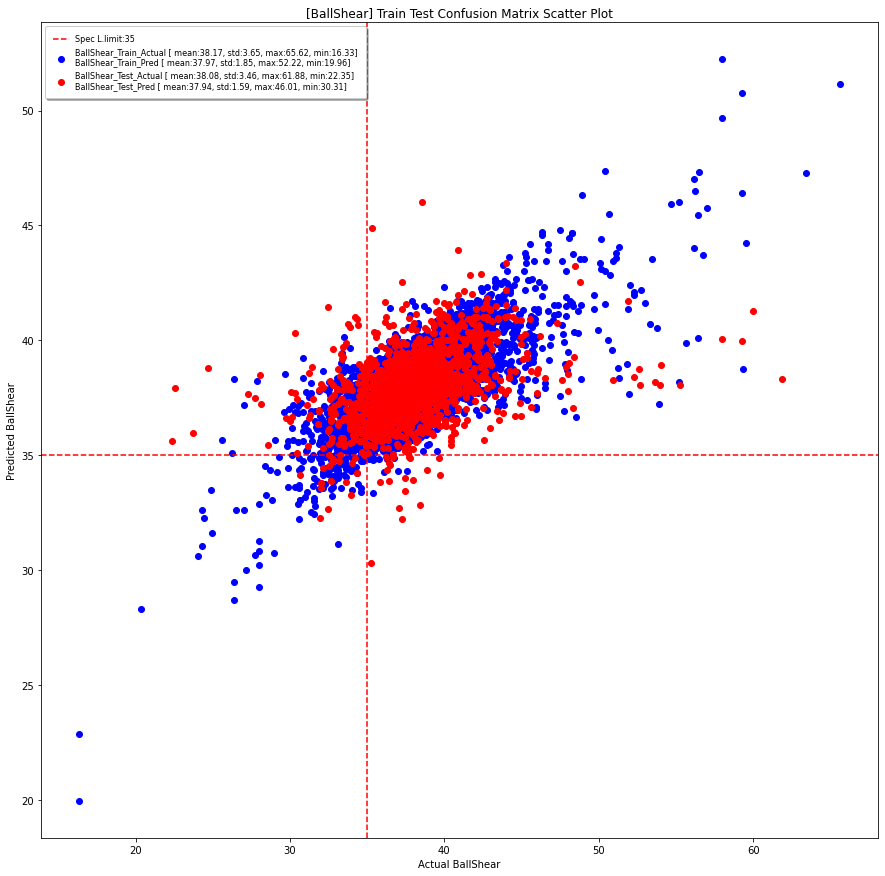

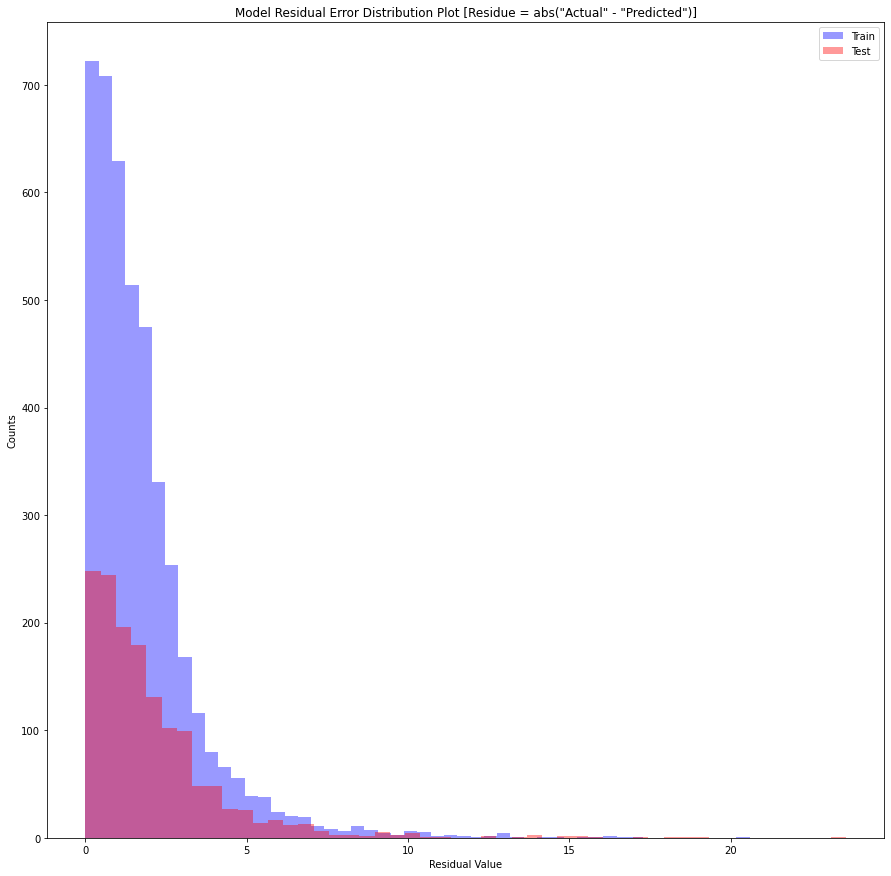

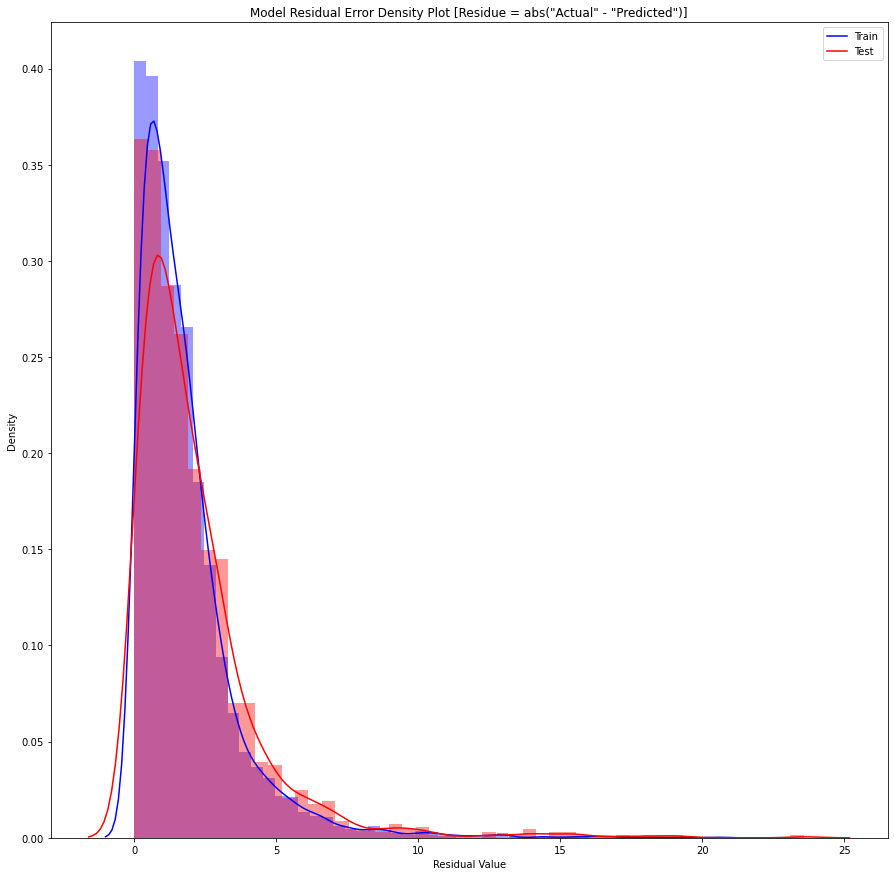

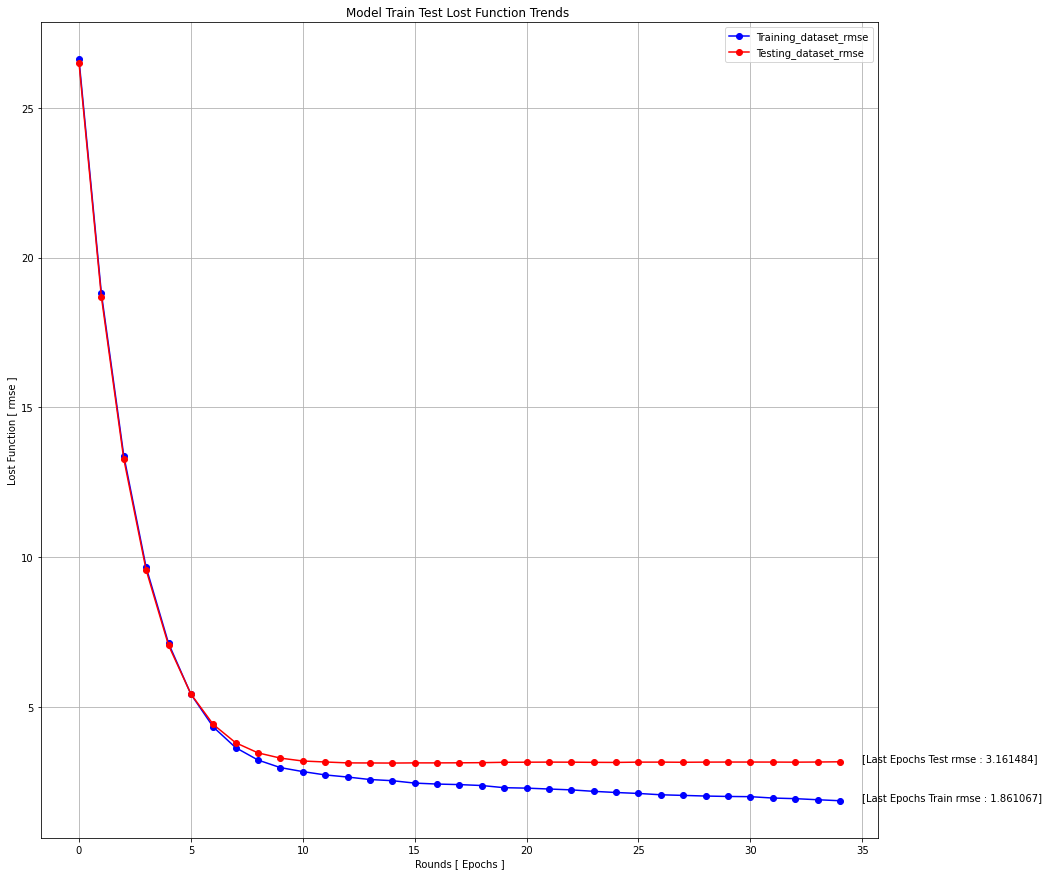

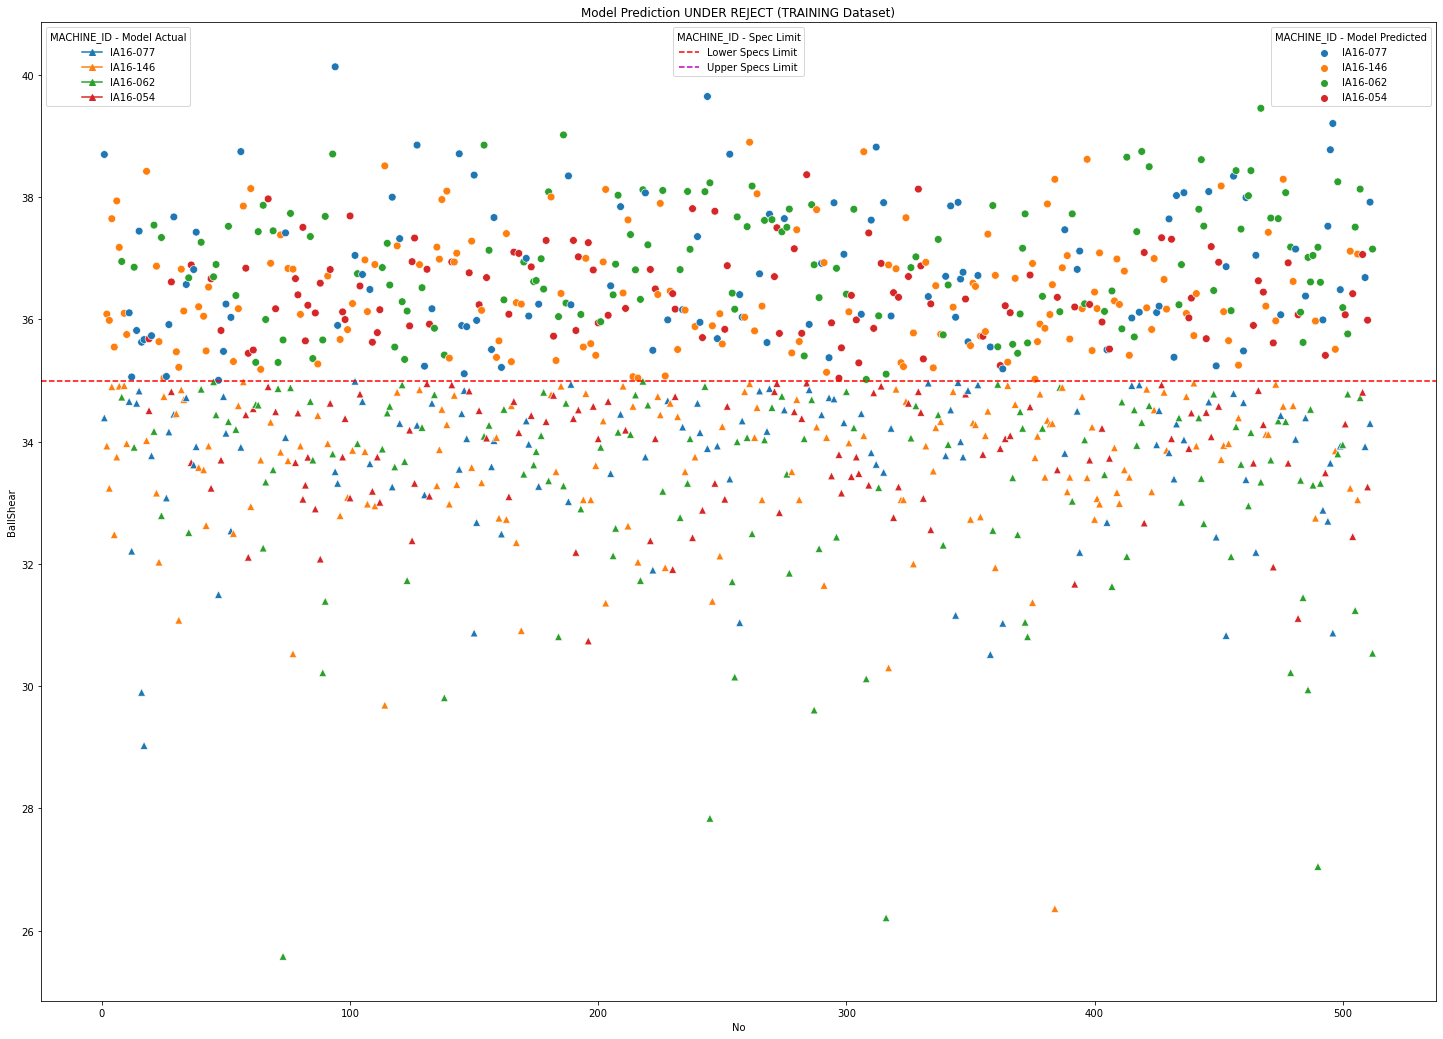

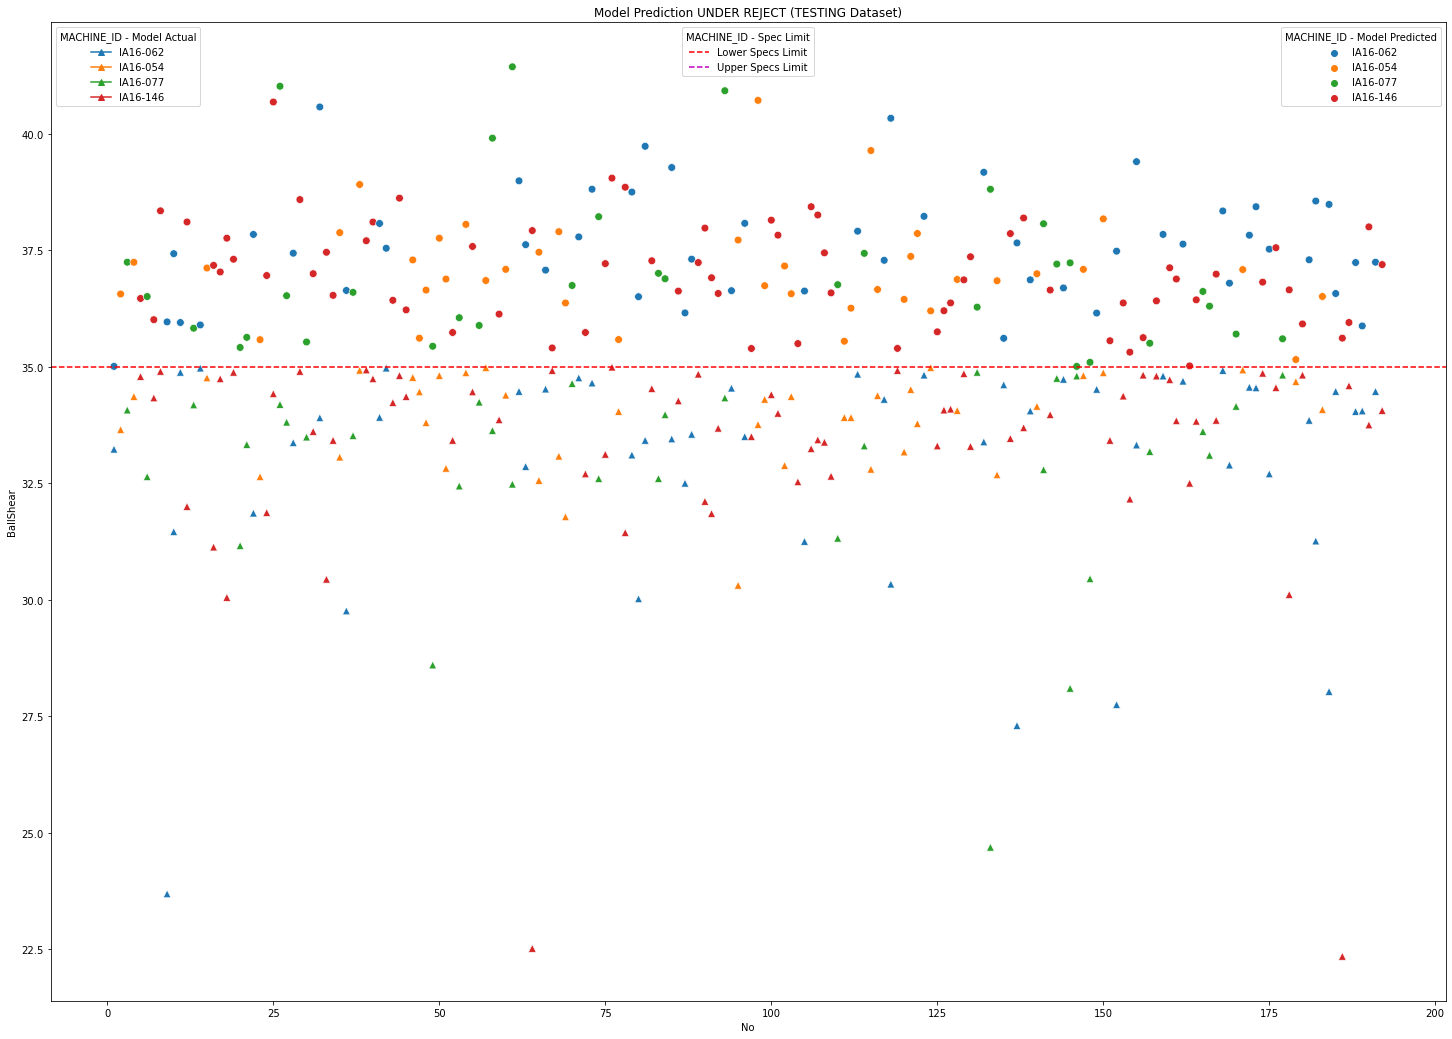

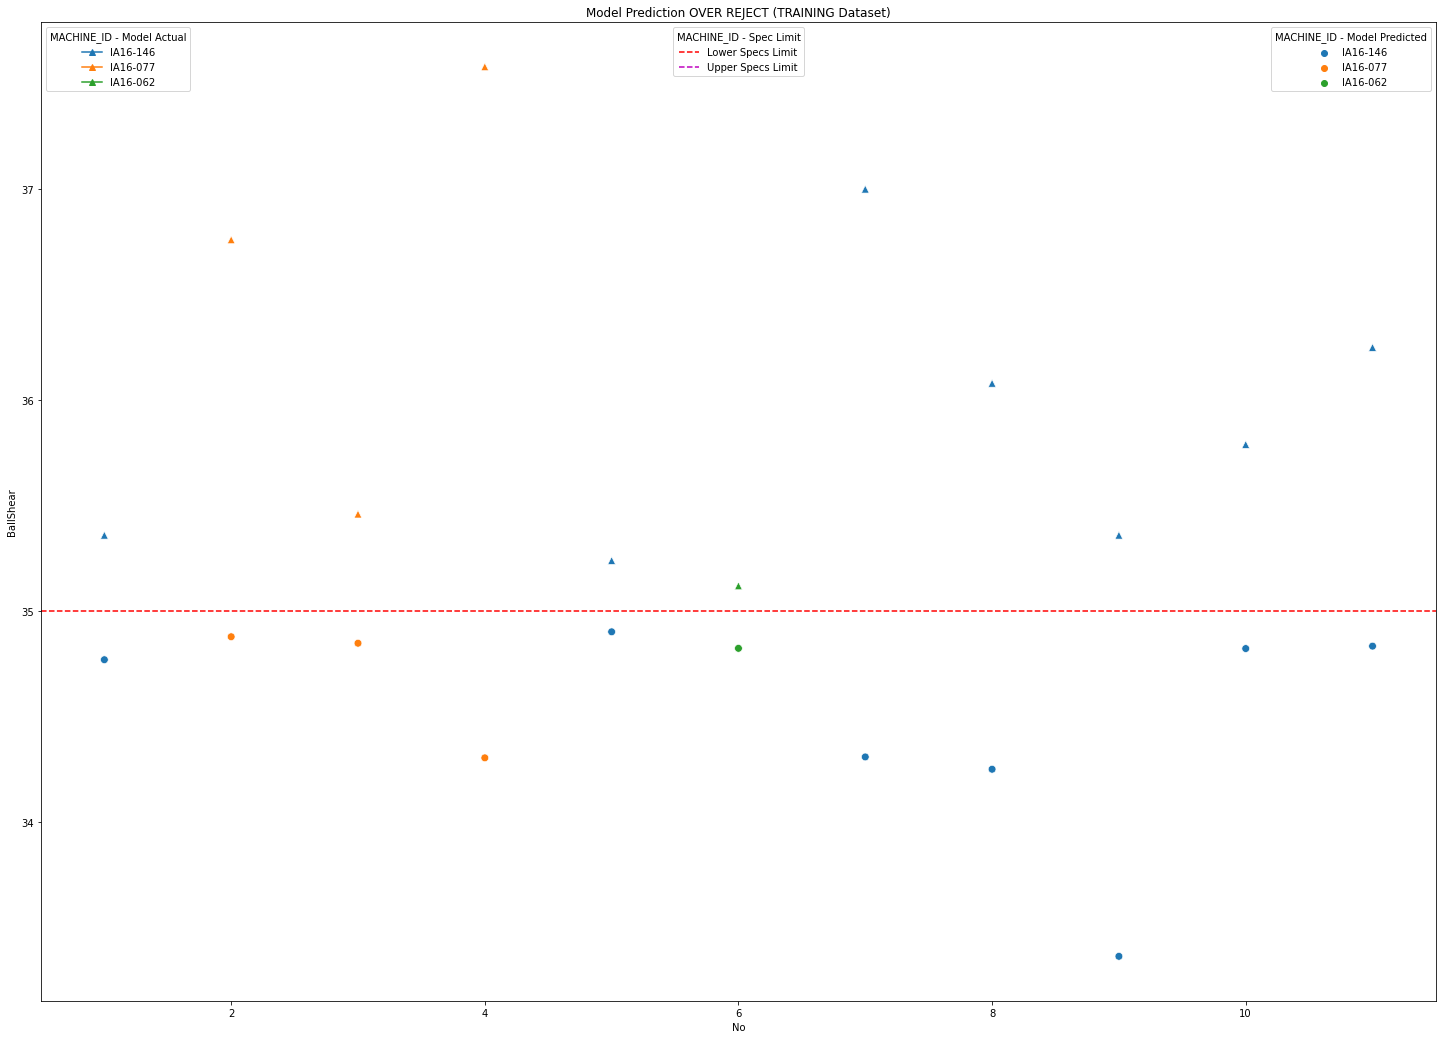

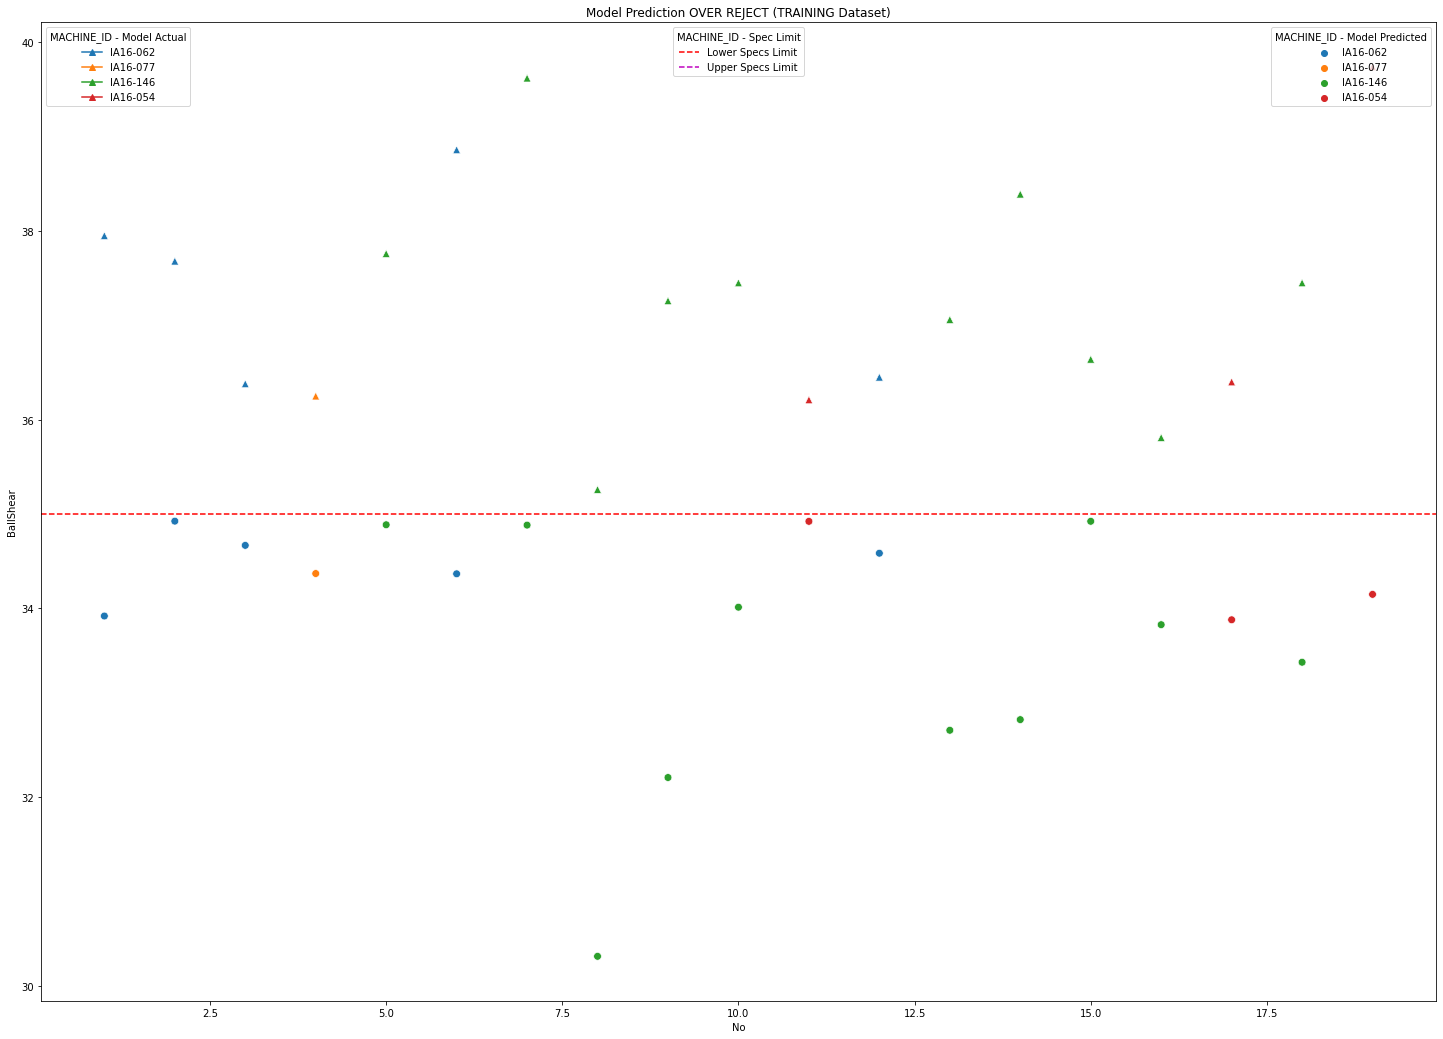

In [ ]:
XGB_model_evaluation_function(model,'BallShear',['MACHINE_ID'],[35,'Null'],X_train_df,x_test_df,X_train,x_test,Y_train,y_test)

In [ ]:
model.evals_result()

{'validation_0': OrderedDict([('rmse',
               [26.619354,
                18.808098,
                13.389616,
                9.658328,
                7.120439,
                5.420938,
                4.323267,
                3.634991,
                3.219515,
                2.967113,
                2.83443,
                2.723167,
                2.652665,
                2.569632,
                2.530532,
                2.450294,
                2.418301,
                2.400083,
                2.368895,
                2.296479,
                2.282316,
                2.252532,
                2.223591,
                2.174725,
                2.136234,
                2.104213,
                2.059945,
                2.039188,
                2.017776,
                2.003999,
                1.996998,
                1.951088,
                1.930684,
                1.894734,
                1.861067])]),
 'validation_1': OrderedDict([('rmse',
      

In [ ]:
model.evals_result()['validation_0']['rmse']

[26.619354,
 18.808098,
 13.389616,
 9.658328,
 7.120439,
 5.420938,
 4.323267,
 3.634991,
 3.219515,
 2.967113,
 2.83443,
 2.723167,
 2.652665,
 2.569632,
 2.530532,
 2.450294,
 2.418301,
 2.400083,
 2.368895,
 2.296479,
 2.282316,
 2.252532,
 2.223591,
 2.174725,
 2.136234,
 2.104213,
 2.059945,
 2.039188,
 2.017776,
 2.003999,
 1.996998,
 1.951088,
 1.930684,
 1.894734,
 1.861067]

In [ ]:
a=list(model.evals_result()['validation_0'].keys())
a[0]

'rmse'

In [ ]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=0, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)